# <font color='#fddf0a'>**Pi Challenge**</font>
---

# <font color='#aeafaf'>**Índice**</font>

1. <font color='#7099c2'>**Descripción del Notebook**</font>
2. <font color='#7099c2'>**Configuraciones**</font>
   - Importación de Librerías
   - Paths
   - Paleta de Colores del Proyecto
3. <font color='#7099c2'>**Extracción de Datos**</font>
   - Extracción de Datos
   - Exploración Inicial
   - Tratamiento de Valores Faltantes
   - Normalización de Datos
4. <font color='#7099c2'>**Análisis Exploratorio de Datos (EDA)**</font>
   - Productos
   - Tiendas
5. <font color='#7099c2'>**Modelado**</font>
   - Baseline Model - OLS
   - Random Forest Regressor
6. <font color='#7099c2'>**Conclusiones**</font>
   - Conclusiones de Negocio
   - Amplificación del Análisis
   - Estrategias de Negocio
7. <font color='#7099c2'>**Artefactos**</font>
8. <font color='#7099c2'>**Procesamiento conjunto de prueba**</font>

# <font color='#7099c2'>**Descripción del Notebook**</font>

# <font color='#7099c2'>**Configuraciones**</font>

## <font color='#fde74c'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

import os
import warnings
import pickle

from timeit import default_timer as timer
from datetime import datetime

from pathlib import Path
from typing import Tuple, Callable, List


from sklearn.metrics import r2_score, mean_squared_error

In [2]:
RANDOM_SEED = 42

## <font color='#fde74c'>**Paths**</font>

In [3]:
# Obtiene el path actual
PROJECT_PATH = os.getcwd()

data = Path('data')
DATA_PATH = PROJECT_PATH / data

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports

results = Path('results')
RESULTS_PATH = PROJECT_PATH / results

dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH, RESULTS_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directorio creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\data

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\reports

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\results



## <font color='#fde74c'>**Paleta de Colores del Proyecto**</font>

**Amarillos (Basados en #fddf0a)**

<span style="display:inline-block; width:20px; height:20px; background:#b29b07; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fddf0a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fde74c; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fef08d; margin-right:5px;"></span>


**Violetas (Basados en #c30afd)**

<span style="display:inline-block; width:20px; height:20px; background:#7b06a1; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#c30afd; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#d451fd; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#e698fe; margin-right:5px;"></span>


**Grises / Neutros (Basados en #474848)**

<span style="display:inline-block; width:20px; height:20px; background:#2e2f2f; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#474848; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#7a7b7b; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#aeafaf; margin-right:5px;"></span>


**Azules**

<span style="display:inline-block; width:20px; height:20px; background:#0a1a2f; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#1c3d5a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#336699; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#7099c2; margin-right:5px;"></span>


In [4]:
# Paleta de Colores del Proyecto
AMARILLO_1, AMARILLO_2, AMARILLO_3, AMARILLO_4 = '#b29b07', '#fddf0a', '#fde74c', '#fef08d'
VIOLETA_1, VIOLETA_2, VIOLETA_3, VIOLETA_4 = '#7b06a1', '#c30afd', '#d451fd', '#e698fe'
GRIS_1, GRIS_2, GRIS_3, GRIS_4 = '#2e2f2f', '#474848', '#7a7b7b', '#aeafaf'
AZUL_1, AZUL_2, AZUL_3, AZUL_4 = '#0a1a2f', '#1c3d5a', '#336699', '#7099c2'

In [5]:
# Definir los colores personalizados
custom_colors = [

    '#0a1a2f', '#1c3d5a', '#336699', '#7099c2', 
    '#e698fe', '#d451fd', '#c30afd', '#7b06a1',
    '#7b06a1', '#c30afd', '#d451fd', '#e698fe',
    '#b29b07', '#fddf0a', '#fde74c', '#fef08d', 
    
]

# Crear el colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
reverse_custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors[::-1])

#### **Colores Principales Pi**

`AMARILLO_2` = '#fddf0a'<br>
`VIOLETA_2` = '#c30afd'

# <font color='#7099c2'>**Extracción de datos y exploración inicial**</font>

## <font color='#fde74c'>**Extracción de datos**</font>

In [6]:
train_ds = pd.read_csv(DATA_PATH/ 'Train_BigMart.csv')
test_ds = pd.read_csv(DATA_PATH/ 'Test_BigMart.csv')

## <font color='#fde74c'>**Exploración inicial**</font>

### <font color='#e698fe'>**Train Set**</font>

In [7]:
train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Valores nulos en `Item_Weight` y `Outlet_Size`

In [9]:
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train_ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
categoricas = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 
               'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [12]:
for col in categoricas:
    unicos = train_ds[col].unique()
    q = train_ds[col].nunique()
    print(f'Valores únicos para {col}: {q}\n')
    print(unicos)
    print('\n','=' * 75,'\n')

Valores únicos para Item_Fat_Content: 5

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Valores únicos para Item_Type: 16

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Valores únicos para Outlet_Identifier: 10

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Valores únicos para Outlet_Establishment_Year: 9

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


Valores únicos para Outlet_Size: 3

['Medium' nan 'High' 'Small']


Valores únicos para Outlet_Location_Type: 3

['Tier 1' 'Tier 3' 'Tier 2']


Valores únicos para Outlet_Type: 4

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




### <font color='#e698fe'>**Test Set**</font>

In [13]:
test_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [14]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Valores nulos en `Item_Weight` y `Outlet_Size`

In [15]:
test_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [16]:
for col in categoricas:
    unicos = test_ds[col].unique()
    q = test_ds[col].nunique()
    print(f'Valores únicos: {q}\n')
    print(unicos)
    print('\n','=' * 75,'\n')

Valores únicos: 5

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


Valores únicos: 16

['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


Valores únicos: 10

['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']


Valores únicos: 9

[1999 2007 1998 1985 1997 2009 2002 1987 2004]


Valores únicos: 3

['Medium' nan 'Small' 'High']


Valores únicos: 3

['Tier 1' 'Tier 2' 'Tier 3']


Valores únicos: 4

['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']




## <font color='#fde74c'>**Tratamiento de Valores Faltantes**</font>

### <font color='#e698fe'>**Item_Weight**</font>

In [17]:
train_ds['Item_Identifier'].nunique()

1559

In [18]:
# Filtrar los registros que tienen valores nulos en la columna 'Item_Weight'
non_weight = train_ds[train_ds['Item_Weight'].isna()]

In [19]:
non_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [20]:
train_ds[train_ds['Item_Identifier'] == 'FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [21]:
train_ds[train_ds['Item_Identifier'] == 'DRI11']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


In [22]:
item_weight_map = train_ds.groupby('Item_Identifier')['Item_Weight'].max()

train_ds['Item_Weight'] = train_ds['Item_Weight'].fillna(train_ds['Item_Identifier'].map(item_weight_map))

In [23]:
item_weight_map = test_ds.groupby('Item_Identifier')['Item_Weight'].max()

test_ds['Item_Weight'] = test_ds['Item_Weight'].fillna(test_ds['Item_Identifier'].map(item_weight_map))

In [24]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### <font color='#c30afd'>**Observaciones Tratamiento de Valores Faltantes: Item_Weight**</font>

Una breve exploración inicial mostró que a pesar de tener valores nulos, existen registros del mismo producto donde el peso del este está completo, por lo que se utilizaron dichos registros para completar aquellos datos faltantes

*De esta manera se redujeron **1463 filas con registros nulos a tan solo 4.***

### <font color='#e698fe'>**Outlet_Size**</font>

In [25]:
# Filtrar los registros que tienen valores nulos en la columna 'Outlet_Size'
non_outlet_size = train_ds[train_ds['Outlet_Size'].isna()]

In [26]:
non_outlet_size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [27]:
non_outlet_size['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [28]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].unique()

array([nan], dtype=object)

In [29]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].unique()

array([nan], dtype=object)

In [30]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].unique()

array([nan], dtype=object)

In [31]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].unique()

array([nan], dtype=object)

In [32]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].unique()

array([nan], dtype=object)

In [33]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].unique()

array([nan], dtype=object)

In [34]:
train_ds.groupby(['Outlet_Identifier', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: count, dtype: int64

In [35]:
test_ds.groupby(['Outlet_Identifier', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           621
OUT018             Medium         618
OUT019             Small          352
OUT027             Medium         624
OUT035             Small          620
OUT046             Small          620
OUT049             Medium         620
Name: count, dtype: int64

In [36]:
outlets = train_ds[['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].copy()
outlets = outlets.drop_duplicates()
outlets

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,Medium,Tier 1,Supermarket Type1
1,OUT018,Medium,Tier 3,Supermarket Type2
3,OUT010,NaN,Tier 3,Grocery Store
4,OUT013,High,Tier 3,Supermarket Type1
7,OUT027,Medium,Tier 3,Supermarket Type3
8,OUT045,NaN,Tier 2,Supermarket Type1
9,OUT017,NaN,Tier 2,Supermarket Type1
11,OUT046,Small,Tier 1,Supermarket Type1
19,OUT035,Small,Tier 2,Supermarket Type1
23,OUT019,Small,Tier 1,Grocery Store


In [37]:
sizes = train_ds.groupby(['Outlet_Type', 'Outlet_Size']).size()
sizes

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [38]:
sizes = train_ds.groupby(['Outlet_Identifier']).size().reset_index()
sizes = sizes.rename(columns={0: 'Sales_Volume'})

In [39]:
outlets = outlets.merge(sizes, on='Outlet_Identifier')
outlets.sort_values(by='Outlet_Type')

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_Volume
2,OUT010,NaN,Tier 3,Grocery Store,555
9,OUT019,Small,Tier 1,Grocery Store,528
0,OUT049,Medium,Tier 1,Supermarket Type1,930
3,OUT013,High,Tier 3,Supermarket Type1,932
5,OUT045,NaN,Tier 2,Supermarket Type1,929
6,OUT017,NaN,Tier 2,Supermarket Type1,926
7,OUT046,Small,Tier 1,Supermarket Type1,930
8,OUT035,Small,Tier 2,Supermarket Type1,930
1,OUT018,Medium,Tier 3,Supermarket Type2,928
4,OUT027,Medium,Tier 3,Supermarket Type3,935


### <font color='#c30afd'>**Observaciones Tratamiento de Valores Faltantes: Outlet_Size**</font>

**OUT010**

Dado que Grocery Store hay solo 2, mi análisis es el siguiente:

| Outlet_Identifier   | Outlet_Size	| Outlet_Location_Type	| Outlet_Type   | Sells_Registered | 
|---------------------|-------------|-----------------------|---------------|------------------|
| OUT019              | Small       | Tier 1                | Grocery Store | 528              |
| OUT010              | NaN         | Tier 3                | Grocery Store | 555              |

Dado que dentro de la columna `Outlet_Type` solo existen 2 tiendas de características **Grocery Store** y que dentro de `Outlet_Location_Type` = **Tier 3** existen tanto locales **Medium** como **High**, sin embargo, el volumen de ventas es mucho mayor (**OUT013	= 932** y **OUT018 = 928**), por lo que sólo podría asumirse que este tipo de tienda es de tamaño **Small** debido a que existe a mi parecer una única comparación lógica que es con tienda del mismo tipo.


**OUT045** y **OUT017**

Las otras dos tiendas que tienen NaN en su tamaño son: **OUT045** y **OUT017**

| Outlet_Identifier   | Outlet_Size	| Outlet_Location_Type	| Outlet_Type       | Sells_Registered |
|---------------------|-------------|-----------------------|-------------------|------------------|
| OUT045              | NaN         | Tier 2                | Supermarket Type1 | 929              |
| OUT017              | NaN         | Tier 2                | Supermarket Type1 | 926              |
| OUT035	          | Small	    | Tier 2	            | Supermarket Type1 | 930              |

Comparten Outlet_Type y Outlet_Location_Type con OUT035

Si bien la mayor cantidad de tiendas corresponden a `Outlet_Type = 'Supermarket Type1'`, los ejemplos mostrados son las únicas pertenecientes a `Outlet_Location_Type = 'Tier 2'`, dado que no contamos con información adicional, podríamos asumir que esto se refiere a un tipo de negocio específico para un área geográfica, como por ejemplo, zonas residenciales. En cuanto al volumen de ventas, este no muestra diferencias significativas entre las tiendas `Outlet_Type = 'Supermarket Type1'`, por lo que, debido a las similutudes con el unico caso completo, también se completarán los NaN como "Small".

In [40]:
train_ds['Outlet_Size'] = train_ds['Outlet_Size'].fillna('Small')
test_ds['Outlet_Size'] = test_ds['Outlet_Size'].fillna('Small')

In [41]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## <font color='#fde74c'>**Normalización de Datos**</font>

### <font color='#e698fe'>**Item_Fat_Content**</font>

In [42]:
train_item_fat_content_vals = train_ds['Item_Fat_Content'].unique()
test_item_fat_content_vals = test_ds['Item_Fat_Content'].unique()

print(f'Valores únicos en Train:\n')
print(train_item_fat_content_vals)
print('\n','=' * 75,'\n')
print(f'Valores únicos en Test:\n')
print(test_item_fat_content_vals)
print('\n','=' * 75,'\n')

Valores únicos en Train:

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Valores únicos en Test:

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']




In [43]:
train_ds['Item_Fat_Content'] = train_ds['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat')
test_ds['Item_Fat_Content'] = test_ds['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat')

In [44]:
train_ds['Item_Fat_Content'] = train_ds['Item_Fat_Content'].replace('reg', 'Regular')
test_ds['Item_Fat_Content'] = test_ds['Item_Fat_Content'].replace('reg', 'Regular')

In [45]:
train_item_fat_content_vals = train_ds['Item_Fat_Content'].unique()
test_item_fat_content_vals = test_ds['Item_Fat_Content'].unique()

print(f'Valores únicos en Train:\n')
print(train_item_fat_content_vals)
print('\n','=' * 75,'\n')
print(f'Valores únicos en Test:\n')
print(test_item_fat_content_vals)
print('\n','=' * 75,'\n')

Valores únicos en Train:

['Low Fat' 'Regular']


Valores únicos en Test:

['Low Fat' 'Regular']




# <font color='#fddf0a'>**Conclusiones: Extracción de datos y exploración inicial**</font>

Tras el análisis de los conjuntos de datos de entrenamiento (`train`) y prueba (`test`), se identificaron patrones de inconsistencia y valores faltantes que requirieron un proceso de curación de datos orientado al negocio.

---

#### <font color='#fde74c'>**Tratamiento de valores faltantes**</font>

Ambos datasets presentaban valores nulos en los campos `Item_Weight` y `Outlet_Size`. Para garantizar la integridad de la información sin recurrir a la eliminación de registros, se aplicaron las siguientes lógicas:

* **Variable `Item_Weight`**: Se detectó que el peso es una propiedad intrínseca de cada producto. Por lo tanto, se utilizó un mapeo por `Item_Identifier` para completar los valores faltantes a partir de otros registros existentes para el mismo producto, logrando una imputación precisa y basada en evidencia física.

* **Variable `Outlet_Size`**: La imputación se realizó bajo un enfoque de **análisis de segmentos y volumen operativo**:
    * **Caso OUT010 (Tier 3 / Grocery Store)**: Al comparar el volumen de registros entre tipos de tiendas, se observó que las *Grocery Stores* (aprox. 550 transacciones) operan a una escala significativamente menor que los *Supermarkets* del mismo Tier (aprox. 930 transacciones). Dada esta diferencia en el volumen operativo y la naturaleza del modelo de negocio, se determinó la categoría **'Small'** como la más representativa.
    * **Casos OUT045 y OUT017 (Tier 2 / Supermarket Type 1)**: Se aplicó una técnica de **Imputación por Segmentos**. Se identificó que el clúster definido por la combinación `Tier 2` y `Supermarket Type 1` es operativamente homogéneo y no presenta registros de tiendas de mayor escala. Dado que el único registro completo en este segmento (`OUT035`) figura como **'Small'**, se procedió a completar los nulos como **'Small'** para mantener la consistencia del perfil operativo regional.


#### <font color='#fde74c'>**Normalización de Datos**</font>

* **Variable `Item_Fat_Content`**: Se identificaron inconsistencias en el registro de etiquetas (ej: "LF", "low fat", "Low Fat"). Se realizó una limpieza para consolidar los datos en dos categorías únicas: **'Low Fat'** y **'Regular'**, eliminando el ruido que afectaría las predicciones del modelo.


#### <font color='#fde74c'>**Ingeniería de Características (Feature Engineering)**</font>

* **Antigüedad de la tienda**: El dataset original provee el año de apertura (`Outlet_Establishment_Year`). Con el fin de facilitar la interpretación para el modelo de regresión lineal, se propone la creación de la variable **`Outlet_Tenure`** (Antigüedad), calculada como la diferencia entre el año actual y el año de fundación. Se asume que la longevidad de un establecimiento puede ser un factor determinante en la lealtad de la clientela y la estabilidad del volumen de ventas.

# <font color='#7099c2'>**Análisis Exploratorio de Datos (EDA)**</font>

#### <font color='#fde74c'>**Productos**</font>

1. ¿Cuáles son las categorías de productos más vendidas y cuáles generan mayores ingresos?
2. ¿La mayor cantidad de ingresos proviene de productos saludables (`Low Fat`) o regulares (`Regular`)?
3. ¿La visibilidad del producto está relacionada a la venta total?
4. ¿La rotación de productos esta ligada al precio (MRP) o existen productos que a pesar de ser caros cuentan con un gran volumen de venta?

#### <font color='#fde74c'>**Tiendas**</font>

5. ¿Cómo es la venta promedio según el tipo de tienda (`Outlet_Type`)?
6. ¿El tipo de tienda concentra mayor ventas de algún tipo de producto en particular?
7. ¿Qué tan incidente resulta el ranking de tipo de ubicación (`Outlet_Location_Type`)
9. ¿Las tiendas más antiguas presentan mayores ventas?

## <font color='#fde74c'>**Productos**</font>

In [46]:
train_ds['Item_Units_Sold'] = train_ds['Item_Outlet_Sales'] / train_ds['Item_MRP']

In [47]:
train_ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Units_Sold
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,12.951520
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,5.078589
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14.016447
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,17.895281


Se quiso calcular las unidades vendidas de cada producto al dividir las ventas totales de cada tienda por el MRP (Maximo Precio Minorista). Sin embargo, esto no devuelve valores enteros, por lo que, si bien podría redondearse hacia abajo, esto no sería información precisa ya que no se conoce a que se debe esta diferencia. Por lo cual se descartará esta variable.

In [48]:
train_ds.drop('Item_Units_Sold', axis=1, inplace=True)

### <font color='#e698fe'>**1. ¿Cuáles son las categorías de productos más vendidas y cuáles generan mayores ingresos?**</font>

In [49]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [50]:
cat_sizes = train_ds.groupby(['Item_Type']).size().reset_index()
cat_sizes = cat_sizes.rename(columns={0: 'Sales_Volume'})

In [51]:
cat_sales = train_ds.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().reset_index()
cat_sales['Item_Outlet_Sales'] = np.round(cat_sales['Item_Outlet_Sales'], 2)

In [52]:
items_sales = cat_sizes.merge(cat_sales, on='Item_Type')
items_sales = items_sales.sort_values(by='Item_Outlet_Sales', ascending=False)
items_sales['Sales_Share'] = np.round((items_sales['Item_Outlet_Sales'] / items_sales['Item_Outlet_Sales'].sum()) * 100,2)
items_sales['Cumulative_Share'] = np.round(items_sales['Sales_Share'].cumsum(),2)
items_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share
6,Fruits and Vegetables,1232,2820059.82,15.17,15.17
13,Snack Foods,1200,2732786.09,14.70,29.87
9,Household,910,2055493.71,11.06,40.93
5,Frozen Foods,856,1825734.79,9.82,50.75
4,Dairy,682,1522594.05,8.19,58.94
3,Canned,649,1444151.49,7.77,66.71
0,Baking Goods,648,1265525.34,6.81,73.52
8,Health and Hygiene,520,1045200.14,5.62,79.14
10,Meat,425,917565.61,4.94,84.08
14,Soft Drinks,445,892897.72,4.80,88.88


In [53]:
items_per_cat = train_ds.groupby(['Item_Type'])['Item_Identifier'].nunique().reset_index()

In [54]:
items_per_cat = items_per_cat.rename(columns={'Item_Identifier': 'Item_Variety'})

In [55]:
items_sales = items_sales.merge(items_per_cat, on='Item_Type')

In [56]:
items_sales['Average_Item_Sale'] = np.round(items_sales['Item_Outlet_Sales'] / items_sales['Item_Variety'], 2)

In [57]:
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75
2,Household,910,2055493.71,11.06,40.93,170,12091.14
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93
4,Dairy,682,1522594.05,8.19,58.94,125,12180.75
5,Canned,649,1444151.49,7.77,66.71,120,12034.60
6,Baking Goods,648,1265525.34,6.81,73.52,119,10634.67
7,Health and Hygiene,520,1045200.14,5.62,79.14,95,11002.11
8,Meat,425,917565.61,4.94,84.08,80,11469.57
9,Soft Drinks,445,892897.72,4.80,88.88,80,11161.22


In [58]:
items_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Type          16 non-null     object 
 1   Sales_Volume       16 non-null     int64  
 2   Item_Outlet_Sales  16 non-null     float64
 3   Sales_Share        16 non-null     float64
 4   Cumulative_Share   16 non-null     float64
 5   Item_Variety       16 non-null     int64  
 6   Average_Item_Sale  16 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.0+ KB


In [59]:
def format_numbers(x):
    if x >= 1e6: return f'${x*1e-6:.1f}M'
    if x >= 1e3: return f'${x*1e-3:.1f}K'
    return f'${x:.0f}'

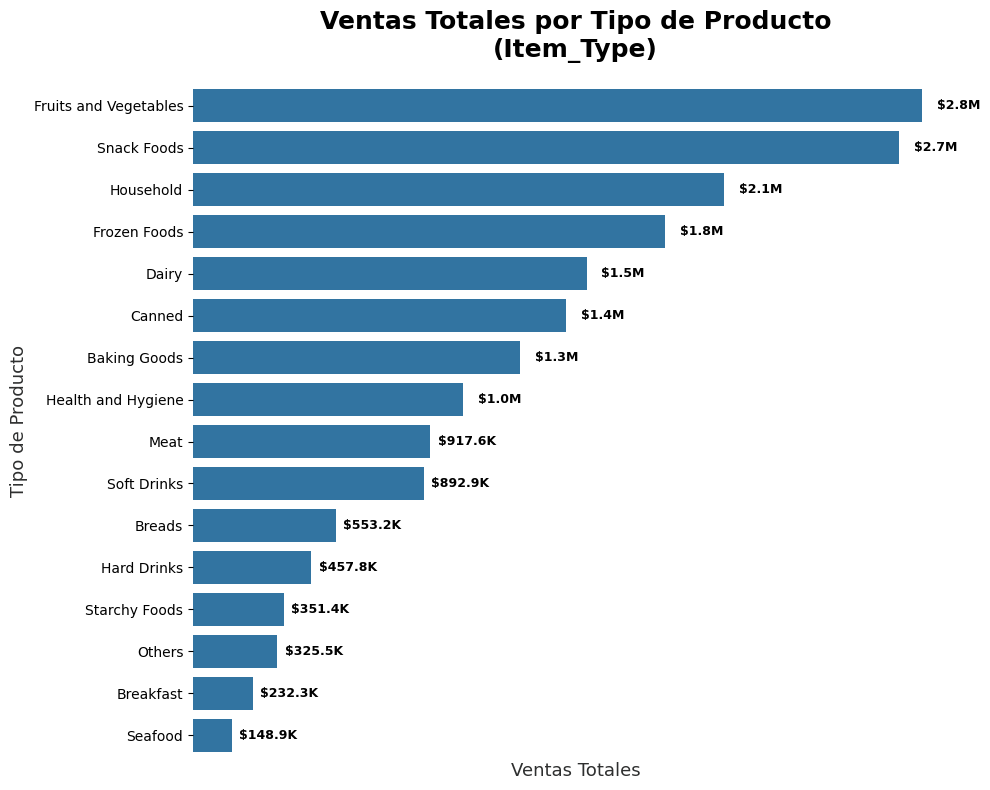

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))

# 1. Crear el gráfico (Usando tu paleta)
sns.barplot(data=items_sales, x='Item_Outlet_Sales', y='Item_Type', ax=ax)#, color=AZUL_3)

# 2. Títulos y etiquetas
ax.set_title('Ventas Totales por Tipo de Producto\n(Item_Type)', 
             fontsize=18, fontweight='bold', pad=20)#, color=GRIS_1)
ax.set_xlabel('Ventas Totales', fontsize=13, color=GRIS_1)
ax.set_ylabel('Tipo de Producto', fontsize=13, color=GRIS_1)

# 3. Anotaciones
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    if width <= 0: continue
    
    ax.text(
        width + (items_sales['Item_Outlet_Sales'].max() * 0.05),                    
        bar.get_y() + bar.get_height()/2,   # Y: Centro vertical de la barra
        format_numbers(width),              # Texto formateado
        va='center', ha='center', 
        #color=GRIS_1, 
        fontweight='bold', fontsize=9
    )
    


# Limpieza visual
sns.despine(left=True, bottom=True)
ax.set_xticks([]) # Opcional: Quitar el eje X ya que los valores están en las barras
plt.tight_layout()
plt.show()

In [61]:
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75
2,Household,910,2055493.71,11.06,40.93,170,12091.14
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93
4,Dairy,682,1522594.05,8.19,58.94,125,12180.75
5,Canned,649,1444151.49,7.77,66.71,120,12034.60
6,Baking Goods,648,1265525.34,6.81,73.52,119,10634.67
7,Health and Hygiene,520,1045200.14,5.62,79.14,95,11002.11
8,Meat,425,917565.61,4.94,84.08,80,11469.57
9,Soft Drinks,445,892897.72,4.80,88.88,80,11161.22


In [62]:
avg_price = train_ds.groupby(['Item_Type']).agg(Item_Type_Avg_Price=('Item_MRP', 'mean')).reset_index()
avg_price

,Item_Type,Item_Type_Avg_Price
0,Baking Goods,126.380766
1,Breads,140.952669
2,Breakfast,141.788151
3,Canned,139.763832
4,Dairy,148.499208
5,Frozen Foods,138.503366
6,Fruits and Vegetables,144.581235
7,Hard Drinks,137.077928
8,Health and Hygiene,130.818921
9,Household,149.424753


In [63]:
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [64]:
items_sales = items_sales.merge(avg_price, on='Item_Type')
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale,Item_Type_Avg_Price
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45,144.581235
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75,146.194934
2,Household,910,2055493.71,11.06,40.93,170,12091.14,149.424753
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93,138.503366
4,Dairy,682,1522594.05,8.19,58.94,125,12180.75,148.499208
5,Canned,649,1444151.49,7.77,66.71,120,12034.60,139.763832
6,Baking Goods,648,1265525.34,6.81,73.52,119,10634.67,126.380766
7,Health and Hygiene,520,1045200.14,5.62,79.14,95,11002.11,130.818921
8,Meat,425,917565.61,4.94,84.08,80,11469.57,139.882032
9,Soft Drinks,445,892897.72,4.80,88.88,80,11161.22,131.492506


In [65]:
avg_visibility = train_ds.groupby(['Item_Type']).agg(Item_Type_Avg_Price=('Item_Visibility', 'mean')).reset_index()
items_sales = items_sales.merge(avg_visibility, on='Item_Type')
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale,Item_Type_Avg_Price_x,Item_Type_Avg_Price_y
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45,144.581235,0.068513
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75,146.194934,0.066850
2,Household,910,2055493.71,11.06,40.93,170,12091.14,149.424753,0.061322
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93,138.503366,0.065645
4,Dairy,682,1522594.05,8.19,58.94,125,12180.75,148.499208,0.072427
5,Canned,649,1444151.49,7.77,66.71,120,12034.60,139.763832,0.068129
6,Baking Goods,648,1265525.34,6.81,73.52,119,10634.67,126.380766,0.069169
7,Health and Hygiene,520,1045200.14,5.62,79.14,95,11002.11,130.818921,0.055216
8,Meat,425,917565.61,4.94,84.08,80,11469.57,139.882032,0.062284
9,Soft Drinks,445,892897.72,4.80,88.88,80,11161.22,131.492506,0.063972


### <font color='#c30afd'>**Observaciones: Tipos de Productos**</font>

A partir de los análisis realizados se determinaron los siguientes puntos:

* El **50% de las ventas provienen de 4 categorías** de productos:

  - ***Fruits and Vegetables:*** 2,820,059 | 15.17% de las ventas totales
  - ***Snack Foods:*** 2,732,786 | 14.70% de las ventas totales
  - ***Household***: 2,055,493 | 11.06% de las ventas totales
  - ***Frozen Foods***: 1,825,734 | 9.82% de las ventas totales

Si agregamos las **4 categorías siguientes** a las mencionadas anteriormente, la porción asciende hasta casi el 80% de las ventas totales de la cadena de negocio. 

Además, se identifica a ***Seafood*** como una categoría de nicho con alta eficiencia de venta por producto individual, lo que sugiere una oportunidad de expansión de inventario.

Conociendo que categorías son las más vendidas, podrán generar hipótesis a partir de el tipo de tienda y su ubicación en relación a la venta de dichos productos.

### <font color='#e698fe'>**2. ¿La mayor cantidad de ingresos proviene de productos saludables (Low Fat) o regulares (Regular)?**</font>

In [66]:
fat_content = train_ds.groupby(['Item_Fat_Content']).agg(
    Sales_Volume=('Item_Identifier', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum'),
    Item_Variety=('Item_Identifier', 'nunique')
)

In [67]:
fat_content

,Sales_Volume,Total_Sales,Item_Variety
Item_Fat_Content,,,
Low Fat,5517,1.190409e+07,1008
Regular,3006,6.687031e+06,551


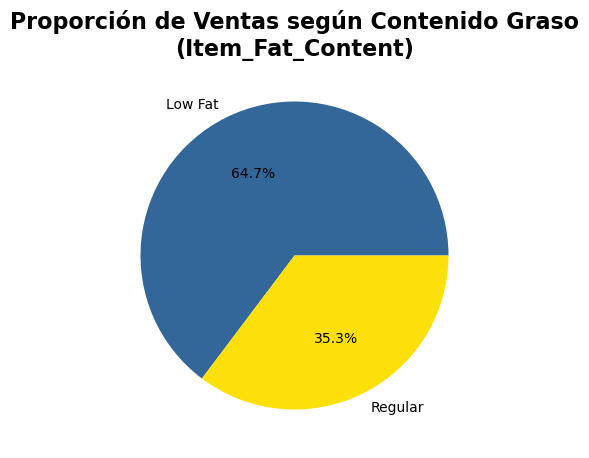

In [68]:
# Visualizar el volumen de ventas en relación al contenido graso (Item_Fat_Content)
fig, ax = plt.subplots(figsize=(6,5))
ax = plt.pie(data=fat_content,
             x=fat_content['Sales_Volume'],
             labels=["Low Fat", "Regular"],
             autopct='%1.1f%%',
             colors=[AZUL_3, AMARILLO_2])

plt.title('Proporción de Ventas según Contenido Graso\n(Item_Fat_Content)', fontsize=16, fontweight='bold')

plt.show()

### <font color='#c30afd'>**Observaciones**</font>

Si bien a simple vista el volumen de ventas se concentra en productos con bajo contenido graso, esta visualización puede estar sesgada debido a tipos de productos (`Item_Type`) que no presenten ambas clasificaciones: **Low Fat** y **Regular**.

Por lo que se realizará un análisis más detallado para entender la tendencia del consumo de los clientes.

In [69]:
# 1. Tu agregación inicial (asegúrate de resetear el índice o trabajar sobre él)
fat_content_shares = train_ds.groupby(['Item_Type', 'Item_Fat_Content']).agg(
    Sales_Volume=('Item_Identifier', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()

# 2. Calculamos el porcentaje relativo por cada Item_Type
# .groupby('Item_Type')['Total_Sales'].transform('sum') crea una serie del mismo tamaño que el df original
# con el total de la categoría repetido en cada fila correspondiente.
fat_content_shares['Fat_Content_Sales_Share'] = (
    fat_content_shares['Total_Sales'] / 
    fat_content_shares.groupby('Item_Type')['Total_Sales'].transform('sum')
) * 100

fat_content_shares['Fat_Content_Volume_Share'] = (
    fat_content_shares['Sales_Volume'] / 
    fat_content_shares.groupby('Item_Type')['Sales_Volume'].transform('sum')
) * 100

col_order = ['Item_Type', 'Item_Fat_Content', 'Sales_Volume', 'Fat_Content_Volume_Share', 'Total_Sales', 'Fat_Content_Sales_Share']
# Aplicamos el formato que configuramos antes
fat_content_shares[col_order]

,Item_Type,Item_Fat_Content,Sales_Volume,Fat_Content_Volume_Share,Total_Sales,Fat_Content_Sales_Share
0,Baking Goods,Low Fat,329,50.771605,5.805237e+05,45.872149
1,Baking Goods,Regular,319,49.228395,6.850017e+05,54.127851
2,Breads,Low Fat,140,55.776892,3.056808e+05,55.253112
3,Breads,Regular,111,44.223108,2.475564e+05,44.746888
4,Breakfast,Low Fat,41,37.272727,9.944189e+04,42.807723
5,Breakfast,Regular,69,62.727273,1.328571e+05,57.192277
6,Canned,Low Fat,341,52.542373,7.531716e+05,52.153227
7,Canned,Regular,308,47.457627,6.909799e+05,47.846773
8,Dairy,Low Fat,418,61.290323,8.966828e+05,58.891784
9,Dairy,Regular,264,38.709677,6.259113e+05,41.108216


### <font color='#c30afd'>**Observaciones: Contenido Graso del Producto**</font>

Se analizó la tendenia del consumo de los clientes en relación al contenido graso (`Item_Fat_Content`) de los productos ofrecidos por la cadena.

Principalmente, se tuvo en cuenta el volumen de venta de productos correspondiente a cada categoría (`Item_Type`), agrupándo los mismos dentro de esta según su contenido graso (`Item_Fat_Content`).

En la mayoría de casos, el volumen de venta de productos es mayor a aquellos que presentan bajo contenido graso (`Item_Fat_Content = 'Low Fat'`). Destacan en particular categorías como:

* ***Soft Drinks***: Aquí la diferencia en el volumen de ventas es extrema, con un **84.04%** para Soft Drinks con bajo contenido graso y **15.96%** para aquellos con contenido graso regular. (Aquí hay aspecto nutricional donde no se debe confundir "Low Fat" con "Low Calories", las bebidas como refrescos no suelen tener grasa, por lo que este dato no significa que la gente esté optando por **Soft Drinks "saludables"**.
  
* ***Dairy***: Los productos de esta categoría con un bajo contenido graso abarcan un **61.29%** del volumen de ventas total dentro de dicha categoría, mientras que aquellos con un contenido graso regular comprenden el **38.71%**.


A su vez, resulta interesante destacar que existen solo dos categorías donde el volumen de ventas es mayor para productos con un contenido graso regular (`Item_Fat_Content = 'Regular'`):

* ***Braekfast***: Donde los productos con un contenido graso regular abarcan el **62.73%** del volumen de ventas dentro de dicha categoría, mientras que aquellos con bajo contenido graso ocupan solo el **37.27%**.
  
* ***Meat***: Con un **60%** del volumen de venta para `Item_Fat_Content = 'Regular'` y **40%** para `Item_Fat_Content = 'Low Fat'`.

Esto indica que en estas dos categorías, el cliente no parece priorizar el contenido graso del producto, sino que considera otros factores al momento de hacer su elección de consumo.


Por último, cabe destacar, que existen casos en los que el volumen de ventas es mayor para productos **Low Fat**, y aún de así el ingreso generado es mayor por productos **Regular**, como por ejemplo: ***Baking Goods*** y ***Fruits and Vegetables***, lo cual puede deberse a que dichos productos sean más caros o de mayor tamaño.

### <font color='#e698fe'>**3. ¿La visibilidad del producto está relacionada a la venta total?**</font>

In [70]:
item_visibility = train_ds.groupby(['Outlet_Identifier', 'Item_Identifier']).agg(
    Average_Visivility_Score=('Item_Visibility', 'mean'),
    Sales_Volume=('Item_Outlet_Sales', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
item_visibility

,Outlet_Identifier,Item_Identifier,Average_Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.068535,1,283.6308
1,OUT010,DRA24,0.066832,1,327.5736
2,OUT010,DRA59,0.214125,1,185.0924
3,OUT010,DRB13,0.011791,1,948.7650
4,OUT010,DRB25,0.116261,1,214.3876
...,...,...,...,...,...
8518,OUT049,NCZ18,0.186357,1,5580.7356
8519,OUT049,NCZ30,0.026226,1,2530.7058
8520,OUT049,NCZ42,0.011305,1,4740.4960
8521,OUT049,NCZ53,0.024515,1,3956.8494


In [71]:
item_visibility_test = train_ds.groupby(['Outlet_Identifier', 'Item_Identifier']).agg(
    Visivility_Score=('Item_Visibility', 'sum'),
    Sales_Volume=('Item_Outlet_Sales', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
item_visibility_test

,Outlet_Identifier,Item_Identifier,Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.068535,1,283.6308
1,OUT010,DRA24,0.066832,1,327.5736
2,OUT010,DRA59,0.214125,1,185.0924
3,OUT010,DRB13,0.011791,1,948.7650
4,OUT010,DRB25,0.116261,1,214.3876
...,...,...,...,...,...
8518,OUT049,NCZ18,0.186357,1,5580.7356
8519,OUT049,NCZ30,0.026226,1,2530.7058
8520,OUT049,NCZ42,0.011305,1,4740.4960
8521,OUT049,NCZ53,0.024515,1,3956.8494


In [72]:
item_visibility_test[item_visibility_test['Item_Identifier'] == 'DRA12']

,Outlet_Identifier,Item_Identifier,Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.068535,1,283.6308
555,OUT013,DRA12,0.040912,1,2552.6772
1487,OUT017,DRA12,0.041178,1,2552.6772
2413,OUT018,DRA12,0.041113,1,850.8924
4804,OUT035,DRA12,0.000000,1,992.7078
5734,OUT045,DRA12,0.000000,1,3829.0158


In [73]:
item_visibility[item_visibility['Item_Identifier'] == 'DRA12']

,Outlet_Identifier,Item_Identifier,Average_Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.068535,1,283.6308
555,OUT013,DRA12,0.040912,1,2552.6772
1487,OUT017,DRA12,0.041178,1,2552.6772
2413,OUT018,DRA12,0.041113,1,850.8924
4804,OUT035,DRA12,0.000000,1,992.7078
5734,OUT045,DRA12,0.000000,1,3829.0158


In [74]:
item_visibility.describe()

,Average_Visivility_Score,Sales_Volume,Total_Sales
count,8523.000000,8523.0,8523.000000
mean,0.066132,1.0,2181.288914
std,0.051598,0.0,1706.499616
min,0.000000,1.0,33.290000
25%,0.026989,1.0,834.247400
50%,0.053931,1.0,1794.331000
75%,0.094585,1.0,3101.296400
max,0.328391,1.0,13086.964800


In [75]:
outlet_item_visibility = train_ds.groupby(['Outlet_Identifier', 'Item_Identifier', 'Item_Visibility']).agg(
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
outlet_item_visibility

,Outlet_Identifier,Item_Identifier,Item_Visibility,Total_Sales
0,OUT010,DRA12,0.068535,283.6308
1,OUT010,DRA24,0.066832,327.5736
2,OUT010,DRA59,0.214125,185.0924
3,OUT010,DRB13,0.011791,948.7650
4,OUT010,DRB25,0.116261,214.3876
...,...,...,...,...
8518,OUT049,NCZ18,0.186357,5580.7356
8519,OUT049,NCZ30,0.026226,2530.7058
8520,OUT049,NCZ42,0.011305,4740.4960
8521,OUT049,NCZ53,0.024515,3956.8494


In [76]:
scatter_item_visibility = train_ds.groupby(['Item_Identifier']).agg(
    Average_Item_Visibility=('Item_Visibility', 'mean'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
scatter_item_visibility.head()

,Item_Identifier,Average_Item_Visibility,Total_Sales
0,DRA12,0.031956,11061.6012
1,DRA24,0.048062,15723.5328
2,DRA59,0.134718,20915.4412
3,DRB01,0.082126,4554.0720
4,DRB13,0.008002,12144.1920


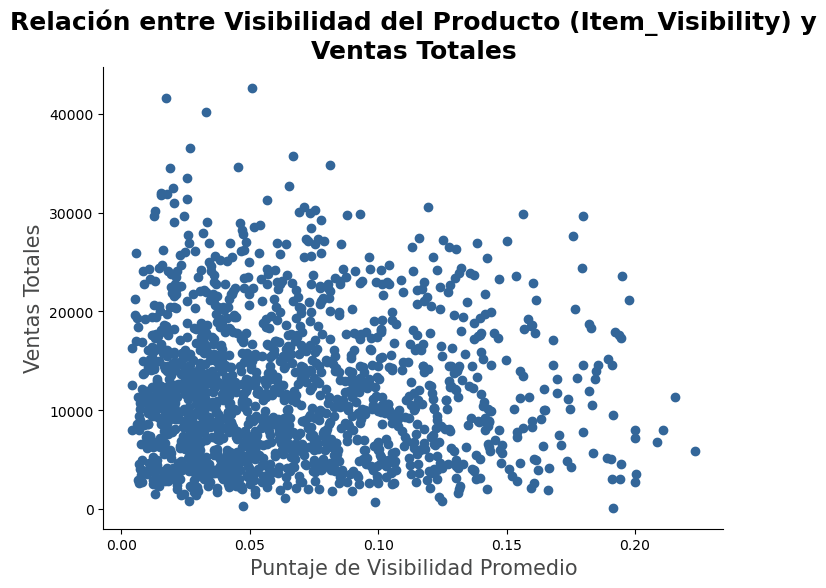

In [77]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(x=scatter_item_visibility['Average_Item_Visibility'], y=scatter_item_visibility['Total_Sales'], c=AZUL_3)
plt.title('Relación entre Visibilidad del Producto (Item_Visibility) y\nVentas Totales', fontsize=18, fontweight='bold')
plt.xlabel('Puntaje de Visibilidad Promedio', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)
sns.despine()

In [78]:
samples = outlet_item_visibility.sample(5, random_state=RANDOM_SEED)
samples_ids = samples['Item_Identifier'].unique()
outlet_item_visibility[outlet_item_visibility['Item_Identifier'].isin(samples_ids)].sort_values(by='Item_Identifier')

,Outlet_Identifier,Item_Identifier,Item_Visibility,Total_Sales
174,OUT010,FDJ03,0.121174,49.2692
856,OUT013,FDJ03,0.072335,886.8456
6043,OUT045,FDJ03,0.072542,886.8456
2707,OUT018,FDJ03,0.072690,788.3072
7031,OUT046,FDM34,0.067448,1967.4390
2791,OUT018,FDM34,0.067722,1573.9512
4239,OUT027,FDM34,0.067121,3279.0650
220,OUT010,FDM34,0.112893,524.6504
5350,OUT035,FDS27,0.012456,2356.9320
2023,OUT017,FDS27,0.012529,3731.8090


In [79]:
train_ds[(train_ds['Item_Identifier'] == 'FDT07')]# & (train_ds['Outlet_Identifier'].isin(['OUT045'

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1904,FDT07,5.82,Regular,0.077255,Fruits and Vegetables,257.633,OUT013,1987,High,Tier 3,Supermarket Type1,1537.998
1993,FDT07,5.82,Regular,0.077319,Fruits and Vegetables,255.433,OUT046,1997,Small,Tier 1,Supermarket Type1,4357.661
2331,FDT07,5.82,Regular,0.000000,Fruits and Vegetables,256.633,OUT049,1999,Medium,Tier 1,Supermarket Type1,2050.664
2656,FDT07,5.82,Regular,0.077756,Fruits and Vegetables,254.533,OUT017,2007,Small,Tier 2,Supermarket Type1,1281.665
2782,FDT07,5.82,Regular,0.135376,Fruits and Vegetables,256.133,OUT019,1985,Small,Tier 1,Grocery Store,256.333
3917,FDT07,5.82,Regular,0.077304,Fruits and Vegetables,257.633,OUT035,2004,Small,Tier 2,Supermarket Type1,4613.994
4995,FDT07,5.82,Regular,0.077476,Fruits and Vegetables,255.333,OUT045,2002,Small,Tier 2,Supermarket Type1,4870.327
6444,FDT07,5.82,Regular,0.077634,Fruits and Vegetables,256.433,OUT018,2009,Medium,Tier 3,Supermarket Type2,3844.995
7609,FDT07,5.82,Regular,0.076945,Fruits and Vegetables,257.133,OUT027,1985,Medium,Tier 3,Supermarket Type3,7433.657


### <font color='#c30afd'>**Observaciones: Visibilidad del Producto**</font>

Los datos muestran que la **Visibilidad del Producto** (`Item_Visibility`) no está relacionada con las ventas del mismo.

El gráfico de puntos *(Scatter Plot)* muestra una dispersión con mucha variabilidad donde no es posible observar una tendencia sólida en cuanto al comportamiento de la relación analizada.

Si tomamos el siguiente ejemplo: **Item_Identifier = FDT07** para ver este fenómeno de cerca:

| Item_Identifier | Item_Visibility | Outlet_Identifier | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sale |
|-----------------|-----------------|-------------------|-------------|----------------------|-------------------|------------------|
| FDT07	          | 0.08            | OUT017	        | Small	      | Tier 2	             | Supermarket Type1 | 1281.66          |
| FDT07	          | 0.08	        | OUT035	        | Small	      | Tier 2	             | Supermarket Type1 | 4613.99          |
| FDT07	          | 0.08	        | OUT045	        | Small	      | Tier 2	             | Supermarket Type1 | 4870.33          |


Podemos ver que en las mismas condiciones: `Item_Visibility`, `Outlet_Size`, `Outlet_Location_Type` y `Outlet_Type`, la venta del producto en una de las tiendas en particular, es considerablemente menor en relación a las otras dos comparadas.
Esto indica, que a pesar de contar con la misma facilidad para ser encontrado, existen otros factores que influyen en la venta del producto.

#### **Nota**:

Una posible causa para esto sería que la manera de cualcular el score de visibilidad no está siendo aplicada correctamente, o que dicha métrica no contempla factores importantes para su cálculo. Se requiere más información para poder determinar el causante.

### <font color='#e698fe'>**4. ¿La rotación de productos está ligada al precio (MRP) o existen productos que a pesar de ser caros cuentan con un gran volumen de venta?**</font>

In [80]:
scatter_item_MRP = train_ds.groupby(['Item_Identifier']).agg(
    Average_Item_MRP=('Item_MRP', 'mean'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
scatter_item_MRP.head()

,Item_Identifier,Average_Item_MRP,Total_Sales
0,DRA12,141.865400,11061.6012
1,DRA24,164.086800,15723.5328
2,DRA59,185.179900,20915.4412
3,DRB01,189.586333,4554.0720
4,DRB13,189.693000,12144.1920


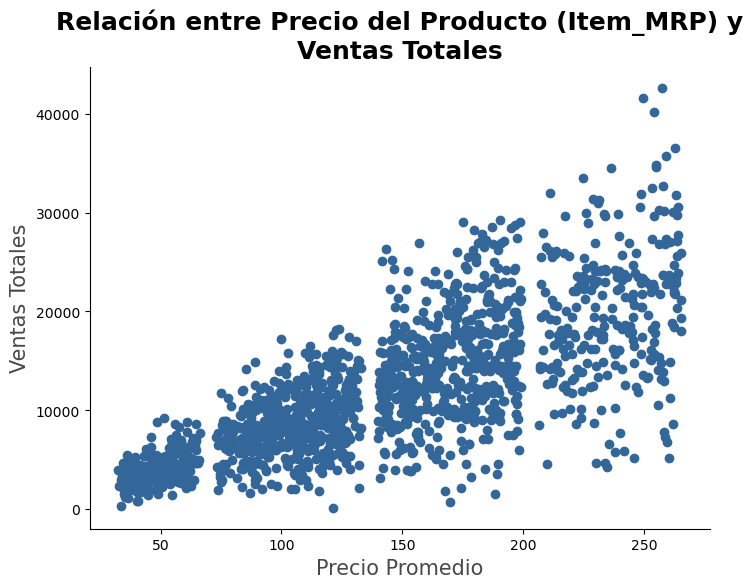

In [81]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(x=scatter_item_MRP['Average_Item_MRP'], y=scatter_item_MRP['Total_Sales'], c=AZUL_3)
plt.title('Relación entre Precio del Producto (Item_MRP) y\nVentas Totales', fontsize=18, fontweight='bold')
plt.xlabel('Precio Promedio', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)
sns.despine()

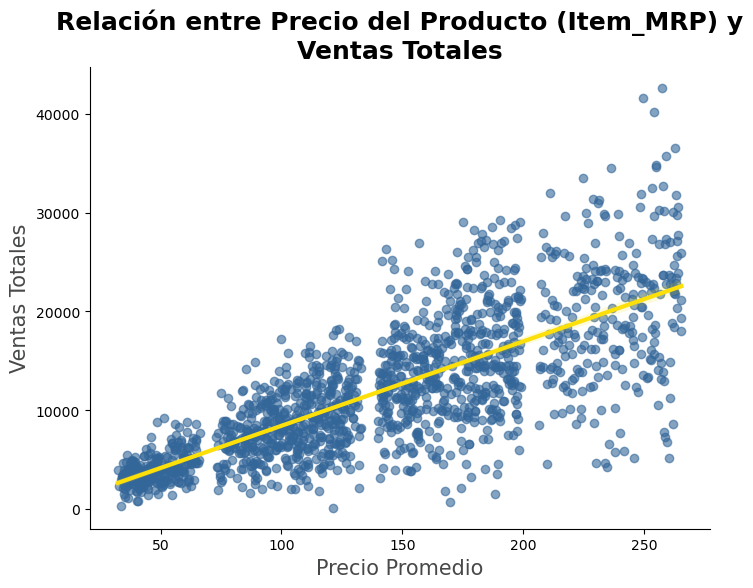

In [82]:
fig, ax = plt.subplots(figsize=(8,6))

# Dibujamos el scatter y la línea de tendencia en un solo paso
sns.regplot(
    data=scatter_item_MRP, 
    x='Average_Item_MRP', 
    y='Total_Sales',
    scatter_kws={'color': AZUL_3, 'alpha': 0.6}, 
    line_kws={'color': AMARILLO_2, 'lw': 3},      
    ax=ax
)

plt.title('Relación entre Precio del Producto (Item_MRP) y\nVentas Totales', fontsize=18, fontweight='bold')
plt.xlabel('Precio Promedio', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)
sns.despine()

### <font color='#c30afd'>**Observaciones: Máximo Precio Minorista**</font>

Al observar el gráfico de dispersión entre el Máximo Precio Minorista Promedio (`Item_MRP`) y las ventas totales de cada producto, resaltan dos factores principales:

* **Existe una fuerte correlación positiva: A mayor precio, mayor ingreso total.**

Sin embargo, la dispersión de los valores se vuelve más pronunciada a medida que el precio del prodcuto aumenta. Esto implica que mientras más alto sea el precio del producto, menor será la certeza de que este vaya a generar los ingresos esperados. El modelo de regresión, tendrá un mayor errror para productos con precios elevados. Esto deberá tratarse con alguna estandarización para disminución del error.

* **Se divisan 4 grupos marcados en los precios**

Es posible observar que existe un pequeño margen entre el promedio de precios que permite separar los datos en 4 subconjuntos, lo que sugiere que podría tratarse de una categorización de precios (Económico, Estándar, Premium, VIP). Esto podría abrir lugar a un análisis dirigido para estudiar cada grupo de manera individual.

## <font color='#fddf0a'>**Conclusiones: Productos**</font>

El anáisis de los productos, en particular las categorías de los mismos, arroja algunos insights de valor:

* #### <font color='#e698fe'>El **50% de los ingresos proviene de solo 4 categorías**:

***Fruits and Vegetables, Snacks Foods, Households, Frozen Foods*** aportan el 50% de los ingresos de la cadena de negocio. Estos son las categorías más comercializadas a lo largo de todas las tiendas, lo que implica que deben ser las mejor monitoreadas, ya que una leve variación el alguna de ellas puede tener un impacto financiero elevado.

* #### <font color='#e698fe'>**El Contenido Graso (`Item_Fat_Content`) y el Puntaje de Visibilidad (`Item_Visibility`) ofrecen señales estadísticas ruidosas**:

Por un lado, el contenido graso muestra una categorización demasiado general. En la categoría de ***Soft Drinks*** por ejemplo, el **84%** de las ventas corresponde a productos clasificados como **Low Fat**. Sin embargo, las bebidas como refrescos, tanto dietéticos como con azucar, no suelen contener grasas. De la  misma forma, categorías como ***Households*** o ***Health and Higene*** está clasificadas como "Low Fat", cuando no son productos comestibles. Esto podría normalizarse para no sesgar las estadísticas.

* #### <font color='#e698fe'>**Marcada correlación positiva entre el Máximo Precio Minorista Promedio y las Ventas Totales**:

Se observa que la variable objetivo (`Item_Outlet_Sales`) y el promedio de `Item_MRP` para cada producto tienen un comportamiento directamente proporcional.
También, se visualizó que existe heterocedasticidad: la varianza del error no es constante, sino que aumenta junto con el precio del producto. Por lo que será indispensable la estandarización de los datos para estabilizar el error.

## <font color='#fde74c'>**Tiendas**</font>

In [83]:
tiendas = train_ds[['Outlet_Identifier',
                    'Outlet_Establishment_Year', 
                    'Outlet_Size', 
                    'Outlet_Location_Type',
                    'Outlet_Type']].drop_duplicates()
tiendas

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
3,OUT010,1998,Small,Tier 3,Grocery Store
4,OUT013,1987,High,Tier 3,Supermarket Type1
7,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,OUT045,2002,Small,Tier 2,Supermarket Type1
9,OUT017,2007,Small,Tier 2,Supermarket Type1
11,OUT046,1997,Small,Tier 1,Supermarket Type1
19,OUT035,2004,Small,Tier 2,Supermarket Type1
23,OUT019,1985,Small,Tier 1,Grocery Store


Importante a tener en cuenta que existe desbalance de clases en las tiendas:

* 2 Grocery Stores
* 1 Supermarket Type2
* 1 Supermarket Type3
* 6 Supermarket Type1

De la misma manera, los tamaños de las tiendas están desbalanceados:

* 6 Small
* 3 Medium
* 1 High (Large)

Por lo que para el análisis se tendrán que analizar valores relativos.

### <font color='#e698fe'>**5. ¿Cómo es la venta promedio según el tipo de tienda?**</font>

Ya se observó en el la subsección de Productos que el 50% de las ventas provienen de 4 categorías. Ahora se analizará si esto se respeta dependiendo el tipo de tienda (`Outlet_Type`) observada.

In [84]:
outlet_type = train_ds.groupby(['Outlet_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Average_Sale=('Item_Outlet_Sales', 'mean'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()

In [85]:
outlet_type['Average_Items_Sold'] = outlet_type['Items_Sold'] / outlet_type['Outlet_Count']
outlet_type

,Outlet_Type,Outlet_Count,Average_Sale,Items_Sold,Average_Items_Sold
0,Grocery Store,2,339.828500,1083,541.5
1,Supermarket Type1,6,2316.181148,5577,929.5
2,Supermarket Type2,1,1995.498739,928,928.0
3,Supermarket Type3,1,3694.038558,935,935.0


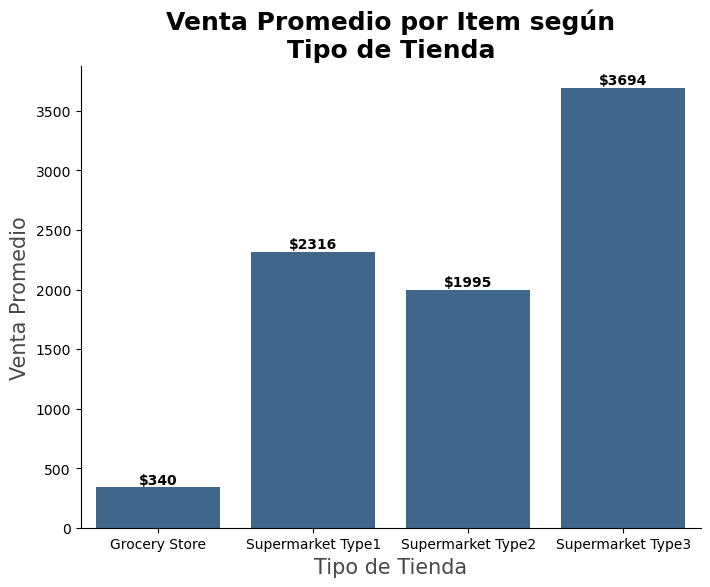

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=outlet_type, x='Outlet_Type', y='Average_Sale', color=AZUL_3)
plt.title('Venta Promedio por Item según\nTipo de Tienda', fontsize=18, fontweight='bold')
plt.xlabel('Tipo de Tienda', fontsize=15, color=GRIS_2)
plt.ylabel('Venta Promedio', fontsize=15, color=GRIS_2)

for bar in ax.patches:
    height = bar.get_height()
    if height == 0:
        continue
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, 
                height + 30,
                f'${height:.0f}',
                ha='center',
                fontweight='bold')
        
sns.despine()
plt.show()

In [87]:
outlet_type_total_sale = train_ds.groupby(['Outlet_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Total_Sale=('Item_Outlet_Sales', 'sum'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()

outlet_type_total_sale['Type_Average_Sale'] = outlet_type_total_sale['Total_Sale'] / outlet_type_total_sale['Outlet_Count']
outlet_type_total_sale

,Outlet_Type,Outlet_Count,Total_Sale,Items_Sold,Type_Average_Sale
0,Grocery Store,2,3.680343e+05,1083,1.840171e+05
1,Supermarket Type1,6,1.291734e+07,5577,2.152890e+06
2,Supermarket Type2,1,1.851823e+06,928,1.851823e+06
3,Supermarket Type3,1,3.453926e+06,935,3.453926e+06


In [88]:
products_offered = train_ds.groupby(['Outlet_Identifier']).agg(
    Items_Sold=('Item_Identifier', 'nunique')
).reset_index()

products_offered.sort_values('Items_Sold')

,Outlet_Identifier,Items_Sold
4,OUT019,528
0,OUT010,555
2,OUT017,926
3,OUT018,928
7,OUT045,929
6,OUT035,930
8,OUT046,930
9,OUT049,930
1,OUT013,932
5,OUT027,935


### <font color='#c30afd'>**Observaciones: Venta Promedio**</font>

El evaular la venta promedio de las tiendas, es posible ver que ***Supermarket Type3*** presenta un rendimiento considerablemente superior.
Si se observan las tiendas que caen en la categoría Supermarket: ***Supermarket Type 1***, ***Supermarket Type 2*** y ***Supermarket Type 3***, la cantidad de items vendidos es similar entre ellos, rondando aproximadamente los 930 items. Sin embargo, la venta total promedio y venta por item promedio en cada uno de ellos:

| Tipo de Tienda          | Venta Total Promedio   | Venta Item Promedio |
|-------------------------|------------------------|---------------------|
|***Supermarket Type 1*** | 2152890.38             | 2316.18             |
|***Supermarket Type 2*** | 1851822.83             | 1995.50             |
|***Supermarket Type 3*** | 3453926.05             | 3694.04             |

A su vez, es posible observar que **Grocery Store** cuenta con una cantidad de productos vendidos significativamente menor. Esto destaca las diferencias en la dinámica entre las tiendas.

Esto sugiere que `Outlet_Type` será un fuerte indicador para el modelo de regresión.

### <font color='#e698fe'>**6. ¿Qué tan incidente resulta el tipo de ubicación (Outlet_Location_Type)?**</font>

In [89]:
outlet_location_type = train_ds.groupby(['Outlet_Location_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Average_Sale=('Item_Outlet_Sales', 'mean'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()

In [90]:
outlet_location_type

,Outlet_Location_Type,Outlet_Count,Average_Sale,Items_Sold
0,Tier 1,3,1876.909159,2388
1,Tier 2,3,2323.990559,2785
2,Tier 3,4,2279.627651,3350


In [91]:
total_outlet_location_type = train_ds.groupby(['Outlet_Location_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Total_Sale=('Item_Outlet_Sales', 'sum'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()
total_outlet_location_type['Average_Location_Sale'] = total_outlet_location_type['Total_Sale'] / total_outlet_location_type['Outlet_Count']
total_outlet_location_type

,Outlet_Location_Type,Outlet_Count,Total_Sale,Items_Sold,Average_Location_Sale
0,Tier 1,3,4.482059e+06,2388,1.494020e+06
1,Tier 2,3,6.472314e+06,2785,2.157438e+06
2,Tier 3,4,7.636753e+06,3350,1.909188e+06


In [92]:
outlet_location_type = train_ds.groupby(['Outlet_Location_Type', 'Outlet_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Total_Sale=('Item_Outlet_Sales', 'sum')
).reset_index()
outlet_location_type['Average_Location_Sale'] = outlet_location_type['Total_Sale'] / outlet_location_type['Outlet_Count']
outlet_location_type.sort_values(by='Outlet_Type')

,Outlet_Location_Type,Outlet_Type,Outlet_Count,Total_Sale,Average_Location_Sale
0,Tier 1,Grocery Store,1,1.796941e+05,1.796941e+05
3,Tier 3,Grocery Store,1,1.883402e+05,1.883402e+05
1,Tier 1,Supermarket Type1,2,4.302365e+06,2.151182e+06
2,Tier 2,Supermarket Type1,3,6.472314e+06,2.157438e+06
4,Tier 3,Supermarket Type1,1,2.142664e+06,2.142664e+06
5,Tier 3,Supermarket Type2,1,1.851823e+06,1.851823e+06
6,Tier 3,Supermarket Type3,1,3.453926e+06,3.453926e+06


### <font color='#c30afd'>**Observaciones: Tipo de Ubicación de la Tienda**</font>

Analizar las ventas promedios utilizando solo el **Tipo de Ubicación (`Outlet_Location_Type`)** resultó injusto ya que la distribución de los tipos de tiendas (`Outlet_Type`) no está balanceado.

Al cruzar dicho análisis con el tipo de tienda, pudiendo así realizar comparaciones entre el mismo tipo de tienda en los distintos tipos de ubicación, no se observan diferencias significativas gracias a esta última variable.

* ***Grocery Store***:

| Outlet_Location_Type	| Outlet_Type	    | Outlet_Count	| Total_Sale	| Average_Location_Sale |
|-----------------------|-------------------|---------------|---------------|-----------------------|
| Tier 1	            | Grocery Store	    | 1	            | 179694.09	    | 179694.09             |
| Tier 3	            | Grocery Store	    | 1	            | 188340.17	    | 188340.17             |

* ***Supermarket Type1***:

| Outlet_Location_Type	| Outlet_Type	    | Outlet_Count	| Total_Sale	| Average_Location_Sale |
|-----------------------|-------------------|---------------|---------------|-----------------------|
| Tier 1	            | Supermarket Type1	| 2	            | 4302364.98	| 2151182.49            |
| Tier 2	            | Supermarket Type1	| 3	            | 6472313.71	| 2157437.90            |
| Tier 3	            | Supermarket Type1	| 1	            | 2142663.58	| 2142663.58            |

Aquellos tipos de tiendas (`Outlet_Type`) que permiten comprar los distintos tipos de ubicación, demuestran que la misma, no impacta significativamente en las ventas promedio de cada tienda.

De lo cual, surgen algunas cuestiones que podrían evaluarse si se contara con mayor información:

* ¿Que diferencia de costos existe entre un Tipo de Ubicación y otro? ¿Justifica esto un margen de ventas poco significativo?
* De ser más costoso, ¿son las ventas lo único importante para mantener las tiendas en dichas ubicaciones? ¿O la presencia frente a la competencia es razón suficiente para mantener los costos más elevados a pesar de no generar mayores ingresos?

Estas preguntas pueden tenerse en cuenta para un análisis futuro.

### <font color='#e698fe'>**7. ¿Las tiendas grandes concentran mayor ventas de algún tipo de producto en particular?**</font>

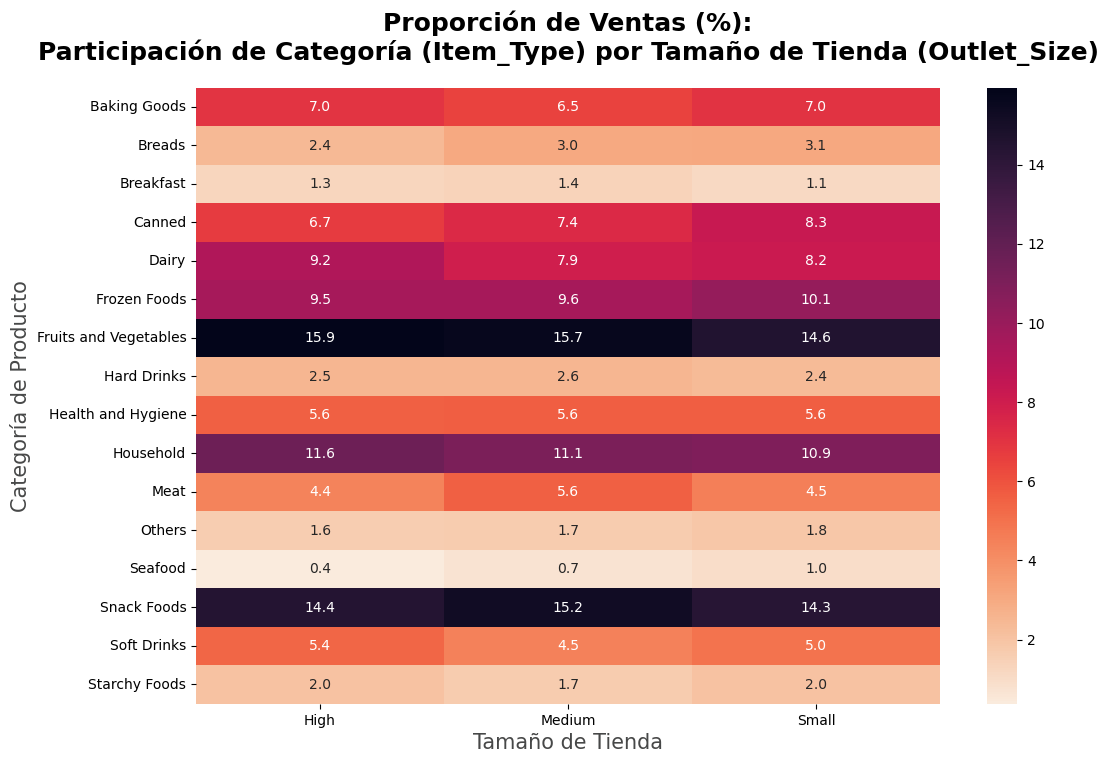

In [93]:
pivot_size_ventas = train_ds.pivot_table(
    index='Item_Type', 
    columns='Outlet_Size', 
    values='Item_Outlet_Sales', 
    aggfunc='sum'
)

pivot_size_share = (pivot_size_ventas / pivot_size_ventas.sum()) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_size_share, annot=True, fmt=".1f", cmap='rocket_r')
plt.title('Proporción de Ventas (%):\nParticipación de Categoría (Item_Type) por Tamaño de Tienda (Outlet_Size)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tamaño de Tienda', fontsize=15, c=GRIS_2)
plt.ylabel('Categoría de Producto', fontsize=15, c=GRIS_2)

plt.show()

In [94]:
pivot_size_share

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,6.987368,6.468877,7.046847
Breads,2.427739,3.012320,3.076376
Breakfast,1.276716,1.377129,1.136322
Canned,6.708110,7.423113,8.309748
Dairy,9.159372,7.932589,8.173143
Frozen Foods,9.506712,9.556447,10.116229
Fruits and Vegetables,15.939356,15.683015,14.554713
Hard Drinks,2.537149,2.554581,2.367519
Health and Hygiene,5.560163,5.618025,5.640191


In [95]:
pivot_size_share['Avg_Share'] = (pivot_size_share['High'] + pivot_size_share['Medium'] + pivot_size_share['Small']) / 3

In [96]:
pivot_size_share['Std_Dev_Share'] = np.sqrt(((pivot_size_share['High'] - pivot_size_share['Avg_Share'])**2 + 
                                     (pivot_size_share['Medium'] - pivot_size_share['Avg_Share'])**2 +  
                                     (pivot_size_share['Small'] - pivot_size_share['Avg_Share'])**2) / 2)

In [97]:
pivot_size_share

Outlet_Size,High,Medium,Small,Avg_Share,Std_Dev_Share
Item_Type,,,,,
Baking Goods,6.987368,6.468877,7.046847,6.834364,0.317915
Breads,2.427739,3.012320,3.076376,2.838812,0.357437
Breakfast,1.276716,1.377129,1.136322,1.263389,0.120955
Canned,6.708110,7.423113,8.309748,7.480324,0.802350
Dairy,9.159372,7.932589,8.173143,8.421702,0.650066
Frozen Foods,9.506712,9.556447,10.116229,9.726462,0.338462
Fruits and Vegetables,15.939356,15.683015,14.554713,15.392361,0.736660
Hard Drinks,2.537149,2.554581,2.367519,2.486416,0.103337
Health and Hygiene,5.560163,5.618025,5.640191,5.606127,0.041320


### <font color='#c30afd'>**Observaciones: Tamaño de tienda y Categoría de Producto**</font>

Se investigó si las tiendas grandes mostraban una mayor concentración en la venta de ciertos productos, sin embargo, al analizar los datos se observa que las diferencias no son significativas en relación al tamaño de la tienda.

Si bien algunos casos como ***Fruits and Vegetables*** la **couta de ventas** es **1.39% mayor en tiendas de tamaño grande *(High)* que en tiendas pequeñas *(Small)***, esto no implica un impacto significativo. 

Por dicha razón, se realizará el mismo análisis pero teniendo en cuenta el tipo de tienda (`Outlet_Type`) en lugar del tamaño de las mismas (`Outlet_Size`)

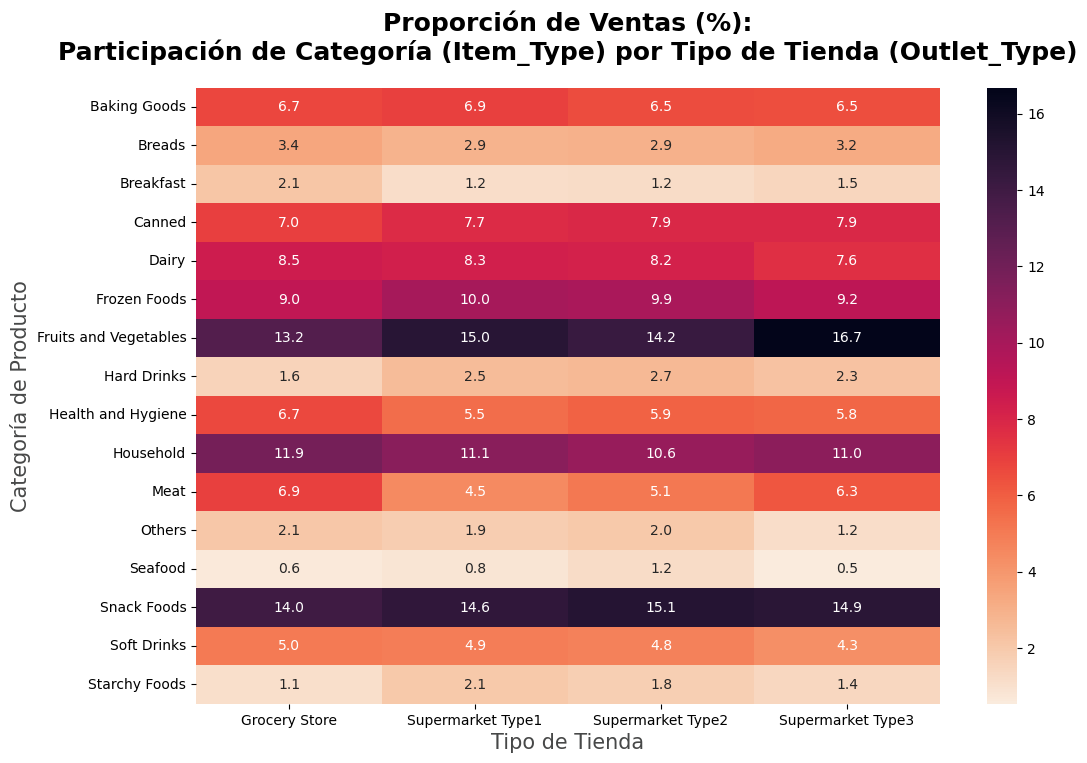

In [98]:
pivot_type_ventas = train_ds.pivot_table(
    index='Item_Type', 
    columns='Outlet_Type', 
    values='Item_Outlet_Sales', 
    aggfunc='sum'
)

pivot_type_share = (pivot_type_ventas / pivot_type_ventas.sum()) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_type_share, annot=True, fmt=".1f", cmap='rocket_r')
plt.title('Proporción de Ventas (%):\nParticipación de Categoría (Item_Type) por Tipo de Tienda (Outlet_Type)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tipo de Tienda', fontsize=15, c=GRIS_2)
plt.ylabel('Categoría de Producto', fontsize=15, c=GRIS_2)
plt.show()

In [99]:
pivot_type_share['Avg_Share'] = (pivot_type_share['Grocery Store'] + 
                                 pivot_type_share['Supermarket Type1'] + 
                                 pivot_type_share['Supermarket Type2'] +
                                 pivot_type_share['Supermarket Type3']) / 4

In [100]:
pivot_type_share['Std_Dev_Share'] = np.sqrt(((pivot_type_share['Grocery Store'] - pivot_type_share['Avg_Share'])**2 + 
                                     (pivot_type_share['Supermarket Type1'] - pivot_type_share['Avg_Share'])**2 +  
                                     (pivot_type_share['Supermarket Type2'] - pivot_type_share['Avg_Share'])**2 +
                                     (pivot_type_share['Supermarket Type3'] - pivot_type_share['Avg_Share'])**2)     / 3)

In [101]:
pivot_type_share

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Avg_Share,Std_Dev_Share
Item_Type,,,,,,
Baking Goods,6.745844,6.932239,6.537617,6.490359,6.676515,0.203427
Breads,3.424933,2.907011,2.948712,3.199802,3.120114,0.240871
Breakfast,2.131266,1.173049,1.214806,1.460146,1.494817,0.442798
Canned,6.999114,7.745868,7.866935,7.879451,7.622842,0.420160
Dairy,8.545869,8.335263,8.215183,7.594755,8.172768,0.408863
Frozen Foods,9.019665,10.007229,9.914502,9.156893,9.524572,0.508305
Fruits and Vegetables,13.205854,14.956311,14.227695,16.677490,14.766838,1.462172
Hard Drinks,1.585650,2.504804,2.670106,2.286033,2.261649,0.477330
Health and Hygiene,6.661179,5.517814,5.877757,5.763997,5.955187,0.494054


### <font color='#c30afd'>**Observaciones: Tipo de Tienda y Categoría de Producto**</font>

Al cruzar esta vez la cuota de ventas de cada categoría (`Item_Type`) de acuerdo al tipo de tienda (`Outlet_Type`), se sigue observando que esto no influye significativamente en la cuota de cada categoría.

Esto es un indicador de que la cadena opera con un inventario estandarizado, lo que permite mantener una oferta variada y estable en todas sus tiendas.

### <font color='#e698fe'>**8. ¿Las tiendas más antiguas presentan mayor ventas?**</font>

In [102]:
outlet_tenure = train_ds.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Establishment_Year']).agg(
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()

In [103]:
from datetime import datetime
today = datetime.today().year

outlet_tenure['Outlet_Tenure'] = today - outlet_tenure['Outlet_Establishment_Year']

In [104]:
outlet_tenure.sort_values('Outlet_Type') 

,Outlet_Identifier,Outlet_Type,Outlet_Establishment_Year,Total_Sales,Outlet_Tenure
0,OUT010,Grocery Store,1998,1.883402e+05,28
4,OUT019,Grocery Store,1985,1.796941e+05,41
1,OUT013,Supermarket Type1,1987,2.142664e+06,39
2,OUT017,Supermarket Type1,2007,2.167465e+06,19
6,OUT035,Supermarket Type1,2004,2.268123e+06,22
7,OUT045,Supermarket Type1,2002,2.036725e+06,24
8,OUT046,Supermarket Type1,1997,2.118395e+06,29
9,OUT049,Supermarket Type1,1999,2.183970e+06,27
3,OUT018,Supermarket Type2,2009,1.851823e+06,17
5,OUT027,Supermarket Type3,1985,3.453926e+06,41


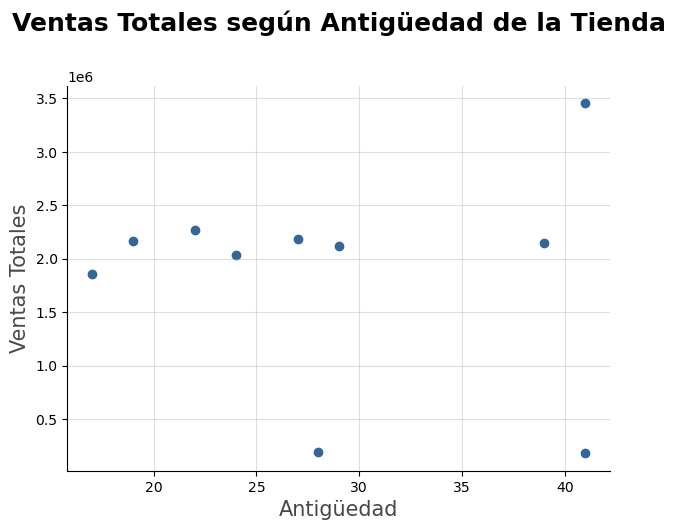

In [105]:
plt.figure(figsize=(7,5))
plt.scatter(data=outlet_tenure,
            x='Outlet_Tenure',
            y='Total_Sales',
            c=AZUL_3)

plt.title('Ventas Totales según Antigüedad de la Tienda', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Antigüedad', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)

plt.grid('--', alpha=0.4)
sns.despine()

plt.show()

### <font color='#c30afd'>**Observaciones: Antigüedad de la Tienda**</font>

A simple vista es posible destacar que la antigüedad de cada tienda no tiene influencia en las ventas totales. Este característica no será un predictor significativo de la variable objetivo.

## <font color='#fddf0a'>**Conclusiones: Tiendas**</font>

Al analizár distintas características referentes a las tiendas, se determinó que:

* El tipo de tienda muestra una marcada diferencia en el volumen de ventas. Especialmente entre aquellos catalogados como Supermarket.
  > ***Supermarket Type3*** presenta una venta promedio considerablemente superior frente a los otros dos (***Supermarket Type1*** y ***Supermarket Type2***).

* El tipo de ubicación no presenta un impacto significativo en las ventas. Por lo que resulta necesario analizar los costos dentro de cada **"Tier"** o revisar el modo de categorización de los sectores.

* La cadena presenta una estabilidad operativa de inventario que permite una oferta variada en todas sus tiendas.

* La antigüedad no esta asociada a mayor cantidad de clientes o ventas.

# <font color='#7099c2'>**Preprocesamiento de Datos**</font>

In [106]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [107]:
train_ds.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
2658,FDB36,5.465,Regular,0.000000,Baking Goods,129.1626,OUT046,1997,Small,Tier 1,Supermarket Type1,3672.5528
2737,FDA33,6.480,Low Fat,0.033900,Snack Foods,146.9076,OUT046,1997,Small,Tier 1,Supermarket Type1,2956.1520
808,FDA09,13.350,Regular,0.149669,Snack Foods,180.2660,OUT045,2002,Small,Tier 2,Supermarket Type1,898.8300
3755,FDK43,9.800,Low Fat,0.026882,Meat,126.3020,OUT049,1999,Medium,Tier 1,Supermarket Type1,3036.0480


In [108]:
test_ds.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
501,FDO46,9.60,Regular,0.023789,Snack Foods,187.8872,OUT010,1998,Small,Tier 3,Grocery Store
444,FDS20,8.85,Low Fat,0.054086,Fruits and Vegetables,182.2292,OUT018,2009,Medium,Tier 3,Supermarket Type2
75,DRC36,13.00,Regular,0.045076,Soft Drinks,173.7054,OUT045,2002,Small,Tier 2,Supermarket Type1
3598,NCW30,5.21,Low Fat,0.011010,Household,258.4962,OUT046,1997,Small,Tier 1,Supermarket Type1
5113,FDB14,20.25,Regular,0.102638,Canned,91.2120,OUT013,1987,High,Tier 3,Supermarket Type1


In [109]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [111]:
train_ds['Item_Weight'] = train_ds['Item_Weight'].fillna(train_ds['Item_Weight'].mean())

In [112]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5661 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [113]:
y = train_ds['Item_Outlet_Sales'].copy()
X = train_ds.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1).copy()

## <font color='#fde74c'>**Train Test Split**</font>

In [114]:
from sklearn.model_selection import train_test_split as tts

In [115]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=RANDOM_SEED)

## <font color='#fde74c'>**Codificación Variables Categóricas y Estandarización de Variables Numéricas**</font>

El conjunto de datos cuenta con variables categóricas de dos tipos:

* **Ordinales**: Donde las categorías respetan un orden
   - Outlet_Location_Type
   - Outlet_Size<br><br>

* **Nominales**: Aquí las clases no respetan un orden.
    - Outlet_Type
    - Item_Type
    - Item_Fat_Content

In [116]:
categoricas_ordinales = ['Outlet_Location_Type', 'Outlet_Size']
categoricas_nominales = ['Outlet_Type', 'Item_Type', 'Item_Fat_Content']

In [117]:
# Definir el orden de las clases ordinales
size_order = ['Small', 'Medium', 'High']
location_order = ['Tier 1', 'Tier 2', 'Tier 3']

preprocessor = make_column_transformer(
    # 1. Variables Numéricas: aplicamos StandardScaler
    (StandardScaler(), ['Item_MRP', 'Item_Weight', 'Item_Visibility']),
    
    # 2. Ordinales: Mantenemos el orden lógico
    (OrdinalEncoder(categories=[location_order, size_order]), 
     categoricas_ordinales),
    
    # 3. Nominales: OneHotEncoder (se utiliza drop=first para evitar introducir multicolinealidad)
    (OneHotEncoder(drop='first', sparse_output=False), 
     categoricas_nominales),
    
    remainder='drop'
)

In [118]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [119]:
columnas = preprocessor.get_feature_names_out()
print(columnas)
columnas_encoded = []
for columna in columnas:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

['standardscaler__Item_MRP' 'standardscaler__Item_Weight'
 'standardscaler__Item_Visibility' 'ordinalencoder__Outlet_Location_Type'
 'ordinalencoder__Outlet_Size'
 'onehotencoder__Outlet_Type_Supermarket Type1'
 'onehotencoder__Outlet_Type_Supermarket Type2'
 'onehotencoder__Outlet_Type_Supermarket Type3'
 'onehotencoder__Item_Type_Breads' 'onehotencoder__Item_Type_Breakfast'
 'onehotencoder__Item_Type_Canned' 'onehotencoder__Item_Type_Dairy'
 'onehotencoder__Item_Type_Frozen Foods'
 'onehotencoder__Item_Type_Fruits and Vegetables'
 'onehotencoder__Item_Type_Hard Drinks'
 'onehotencoder__Item_Type_Health and Hygiene'
 'onehotencoder__Item_Type_Household' 'onehotencoder__Item_Type_Meat'
 'onehotencoder__Item_Type_Others' 'onehotencoder__Item_Type_Seafood'
 'onehotencoder__Item_Type_Snack Foods'
 'onehotencoder__Item_Type_Soft Drinks'
 'onehotencoder__Item_Type_Starchy Foods'
 'onehotencoder__Item_Fat_Content_Regular']


In [120]:
X_train_df = pd.DataFrame(X_train_preprocessed, columns=columnas_encoded)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=columnas_encoded)

In [121]:
X_train_df.head()

,Item_MRP,Item_Weight,Item_Visibility,Outlet_Location_Type,Outlet_Size,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Regular
0,0.470709,-0.733790,-0.600703,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.457877,1.096431,-0.362159,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.482625,1.010303,0.194933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.603553,-0.986791,-0.704944,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.218375,-0.012467,1.383177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## <font color='#fde74c'>**Transformación Variable Objetivo**</font>

Al analizar la relación entre el precio del producto (`Item_MRP`) y las ventas del mismo (`Item_Outlet_Sales`), se identificó que el aumento del precio conlleva una mayor dispersión de los datos. Este fenómeno de heterocedasticidad indica que la varianza del error no es constante, lo cual viola uno de los supuestos fundamentales de la regresión lineal.

Para mitigar este efecto, se aplicará una **transformación logarítmica** sobre la variable objetivo. Esta técnica permite estabilizar la varianza (tendiendo a la **homocedasticidad**) y normalizar la distribución de los residuos, mejorando así la capacidad predictiva y la robustez del modelo.

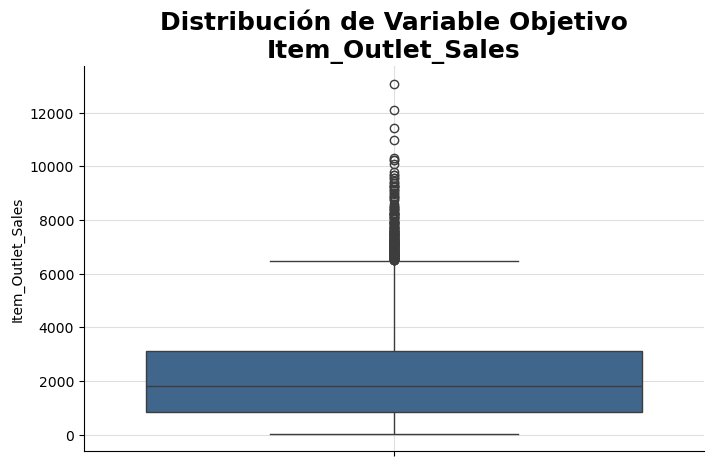

In [122]:
fig, ax = plt.subplots(figsize=(8, 5))
    
ax = sns.boxplot(data=train_ds, y='Item_Outlet_Sales', color=AZUL_3)
plt.title('Distribución de Variable Objetivo\nItem_Outlet_Sales', fontsize=18, fontweight='bold')
sns.despine()
plt.grid('--', alpha=0.4)
plt.show()

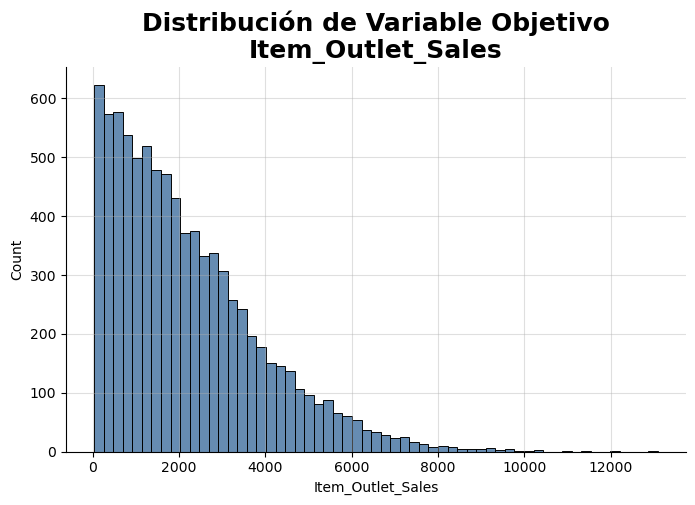

In [123]:
fig, ax = plt.subplots(figsize=(8, 5))
    
ax = sns.histplot(data=train_ds, x='Item_Outlet_Sales', color=AZUL_3)
plt.title('Distribución de Variable Objetivo\nItem_Outlet_Sales', fontsize=18, fontweight='bold')
sns.despine()
plt.grid('--', alpha=0.4)
plt.show()

$$\Large Venta\_Final = e^{prediccion} - 1$$

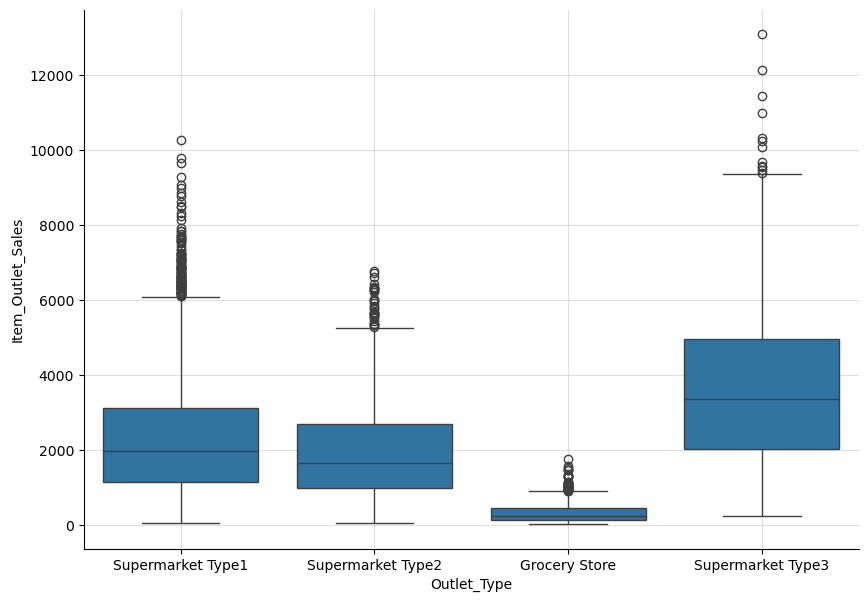

In [124]:
# Comparar ventas (variable numérica) segmentada por tipo de tienda (categórica)
plt.figure(figsize=(10, 7))
sns.boxplot(data=train_ds, x='Outlet_Type', y='Item_Outlet_Sales')
sns.despine()
plt.grid('-', alpha=0.4)

In [125]:
y_train_preprocessed = np.log1p(y_train).reset_index(drop=True)
y_test_preprocessed = np.log1p(y_test).reset_index(drop=True)

In [126]:
y_train_preprocessed

0       7.777888
1       8.040756
2       7.026606
3       5.653529
4       8.348893
          ...   
6813    5.641792
6814    7.172147
6815    8.723611
6816    7.409047
6817    6.873588
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

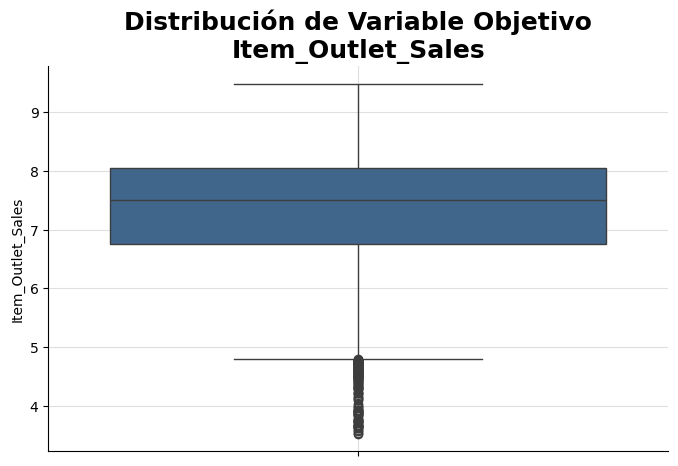

In [127]:
fig, ax = plt.subplots(figsize=(8, 5))
    
ax = sns.boxplot(data=y_train_preprocessed, color=AZUL_3)
plt.title('Distribución de Variable Objetivo\nItem_Outlet_Sales', fontsize=18, fontweight='bold')
sns.despine()
plt.grid('--', alpha=0.4)
plt.show()

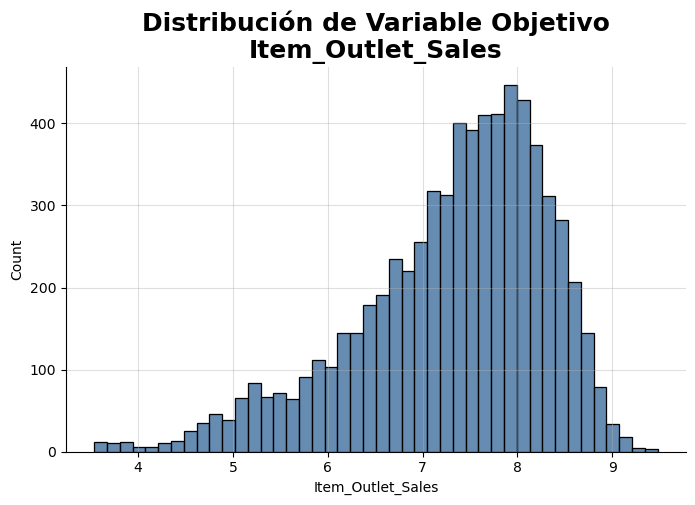

In [128]:
fig, ax = plt.subplots(figsize=(8, 5))
    
ax = sns.histplot(data=y_train_preprocessed, color=AZUL_3)
plt.title('Distribución de Variable Objetivo\nItem_Outlet_Sales', fontsize=18, fontweight='bold')
sns.despine()
plt.grid('--', alpha=0.4)
plt.show()

### <font color='#c30afd'>**Observaciones: Transformación Variable Objetivo**</font>

Si bien la transformación no consigue normalizar por completo la distribución de los datos, esta, muestra una tendencia más cercana hacia una campana de Gauss, mientras que inicialmente la distribución era similar a una distribución Exponencial.

## <font color='#fde74c'>**Variance Inflation Factor (VIF)**</font>

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [130]:
df_vif = X_train_df.copy()

In [131]:
df_vif.columns

Index(['Item_MRP', 'Item_Weight', 'Item_Visibility', 'Outlet_Location_Type',
       'Outlet_Size', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Item_Fat_Content_Regular'],
      dtype='object')

In [132]:
features = df_vif.columns
len(features)

24

In [133]:
df_vif_1 = pd.DataFrame()
df_vif_1['Feature'] = features
df_vif_1['VIF'] = [vif(df_vif[features], i) for i in range(len(features))]

In [134]:
df_vif_1.sort_values('VIF', ascending=False)

,Feature,VIF
5,Outlet_Type_Supermarket Type1,4.957638
3,Outlet_Location_Type,4.674147
4,Outlet_Size,2.359202
7,Outlet_Type_Supermarket Type3,2.140891
6,Outlet_Type_Supermarket Type2,2.118069
13,Item_Type_Fruits and Vegetables,1.946767
20,Item_Type_Snack Foods,1.886389
23,Item_Fat_Content_Regular,1.822063
16,Item_Type_Household,1.663973
12,Item_Type_Frozen Foods,1.624652


# <font color='#7099c2'>**Modelado**</font>

In [135]:
def metricas_evaluacion(model,
                        nombre_modelo: str,
                        X_train=X_train_df,
                        y_train=y_train_preprocessed,
                        X_test=X_test_df,
                        y_test=y_test_preprocessed,
                        observaciones:str ='---'
                        ):

    """
    Calcula y centraliza las métricas de rendimiento para modelos de regresión.

    Esta función evalúa el modelo tanto en el conjunto de entrenamiento como en el de prueba, 
    calculando coeficientes de determinación (R²), variabilidad, error cuadrático medio (RMSE) 
    y el error absoluto medio (MAE) en la escala original de la moneda (pesos).

    ================================================
    Parameters
    ----------
    model : estimator object
        Modelo de scikit-learn o compatible ya entrenado que implemente el método .predict().
    nombre_modelo : str
        Nombre identificador del modelo para la tabla comparativa final.
    X_train : DataFrame o array-like, optional
        Conjunto de variables predictoras de entrenamiento. Por defecto es X_train_df.
    y_train : Series o array-like, optional
        Variable objetivo de entrenamiento (en escala logarítmica). Por defecto es y_train_preprocessed.
    X_test : DataFrame o array-like, optional
        Conjunto de variables predictoras de prueba. Por defecto es X_test_df.
    y_test : Series o array-like, optional
        Variable objetivo de prueba (en escala logarítmica). Por defecto es y_test_preprocessed.
    observaciones : str, optional
        Notas adicionales sobre la configuración o comportamiento del modelo. Por defecto es '---'.
        
    ================================================
    Returns
    -------
    dict
        Diccionario con las métricas calculadas:
        - 'Model': Nombre del modelo.
        - 'Train R-Squared': R² en entrenamiento.
        - 'Test R-Squared': R² en prueba.
        - 'R-Squared Variability': Diferencia entre Test R² y Train R² (indicador de overfitting).
        - 'RMSE Test': Raíz del Error Cuadrático Medio en escala logarítmica.
        - 'MAE': Error Absoluto Medio en la escala real de ventas (revertido con expm1).
        - 'Observaciones': Comentarios adicionales.
    """
    
    metrics = {}
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_r2 = np.round(r2_score(y_train, train_preds), 4)
    test_r2 = np.round(r2_score(y_test, test_preds), 4)
    variability = test_r2 - train_r2
    rmse = np.round(np.sqrt(mean_squared_error(y_test, test_preds)), 4)


    y_test_real = np.expm1(y_test)
    y_pred_real = np.expm1(test_preds)
    mae = np.round(np.abs(y_test_real - y_pred_real).mean(), 2)

    
    metrics['Model'] = nombre_modelo
    metrics['Train R-Squared'] = train_r2
    metrics['Test R-Squared'] = test_r2
    metrics['R-Squared Variability'] = variability
    metrics['RMSE Test'] = rmse
    metrics['MAE'] = mae
    metrics['Observaciones'] = observaciones

    return metrics

In [136]:
def plot_analisis_variables(df: pd.core.frame.DataFrame, 
                            nombre_modelo: str, 
                            save: str,
                            n_vars: int= None,
                            save_path: Path=IMG_PATH,
                            space: float=0.5,
                            cmap='rocket_r'):
    """
    Funcion que permite visualizar Importancias de modelos, guardando la figura en la ruta correspondiente.
    -----------------------------------------------------------------------------------
    Parámetros:
        df: pandas.core.frame.DataFrame
            DataFrame con las variables del modelo y sus importancias o coeficientes.
            
        nombre_modelo: str
            Nombre que aparecerá en el título del gráfico.
            
        save: str
            Nombre que se utilizará para guardar el gráfico con: "{analisis}_variables_{save}.png"
            
        n_vars: int
            Cantidad de variables que se desean analizar. Para análisis de coeficientes toma (n_vars / 2) para head y tail.
            
        save_path: Path
            Ruta para guardar el gráfico. Default IMG_PATH
    -----------------------------------------------------------------------------------
    Returns:
        Gráfico de barras horizontales con Importancia de variables determinadas por modelo.
    """

        
    if n_vars:
        df = df.head(n_vars)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Importancia', y='Feature', orient='h', hue='Importancia', palette=cmap)
    plt.title(f'Importancias de Variables - {nombre_modelo}', fontsize=18, loc='left', fontweight='bold')
    plt.xlabel('Importancia', fontsize=16)
    plt.ylabel('Feature', fontsize=16)


    x_max = df['Importancia'].max()
    x_min = df['Importancia'].min()
    
    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        if width != 0:
            ax.text(
                (width + (x_max * space)), y,
                f'{width*100:.2f}%',
                ha='center', va='center',
                fontsize=9, color='black', fontweight='bold'
                )
        
    sns.despine()
    plt.tight_layout()

    fig.savefig(IMG_PATH / f'importancia_variables_{save}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    
    plt.show()

In [137]:
results_tracking = []

## <font color='#fde74c'>**Baseline Model - OLS**</font>

In [138]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_df)
baseline_model = sm.OLS(y_train_preprocessed, X_train_sm).fit()

### <font color='#e698fe'>**Resumen Baseline Model**</font>

In [139]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     720.2
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        12:03:51   Log-Likelihood:                -5443.6
No. Observations:                6818   AIC:                         1.094e+04
Df Residuals:                    6793   BIC:                         1.111e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               5.5861      0.033    170.365      0.000       5.522       5.650
Item_MRP                            0.5179      0.007     78.894      0.000       0.505       0.531
Item_Weight                        -0.0060      0.007     -0.911      0.362      -0.019       0.007
Item_Visibility                    -0.0077      0.007     -1.122      0.262      -0.021       0.006
Outlet_Location_Type               -0.0062      0.011     -0.569      0.569      -0.027       0.015
Outlet_Size                         0.0040      0.012      0.348      0.728      -0.019       0.027
Outlet_Type_Supermarket Type1       1.9353      0.022     87.730      0.000       1.892       1.979
Outlet_Type_Supermarket Type2       1.7655      0.030     58.735      0.000       1.707       1.824
Outlet_Type_Supermarket Type3       2.4621      0.030     81.947      0.000       2.403       2.521
Item_Type_Breads                    0.0066      0.046      0.144      0.886      -0.083       0.096
Item_Type_Breakfast                -0.0376      0.063     -0.598      0.550      -0.161       0.086
Item_Type_Canned                    0.0225      0.034      0.667      0.505      -0.044       0.089
Item_Type_Dairy                    -0.0736      0.033     -2.199      0.028      -0.139      -0.008
Item_Type_Frozen Foods             -0.0460      0.032     -1.457      0.145      -0.108       0.016
Item_Type_Fruits and Vegetables     0.0097      0.029      0.329      0.742      -0.048       0.067
Item_Type_Hard Drinks              -0.0061      0.047     -0.130      0.897      -0.098       0.086
Item_Type_Health and Hygiene        0.0385      0.037      1.052      0.293      -0.033       0.110
Item_Type_Household                -0.0130      0.032     -0.405      0.685      -0.076       0.050
Item_Type_Meat                      0.0145      0.038      0.378      0.705      -0.061       0.090
Item_Type_Others                    0.0061      0.052      0.117      0.907      -0.096       0.108
Item_Type_Seafood                   0.0439      0.081      0.539      0.590      -0.116       0.203
Item_Type_Snack Foods              -0.0004      0.030     -0.014      0.989      -0.058       0.058
Item_Type_Soft Drinks              -0.0277      0.038     -0.735      0.463      -0.101       0.046
Item_Type_Starchy Foods            -0.0477      0.053     -0.894      0.371      -0.152       0.057
Item_Fat_Content_Regular            0.0132      0.015      0.873      0.382      -0.016       0.043
==============================================================================
Omnibus:                      667.891   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.857
Skew:                          -0.777   Prob(J

### <font color='#c30afd'>**Observaciones: Resumen del Modelo**</font>

1. **Significancia del modelo**

* La métrica **Adjusted R-Squared** con un valor de 0.72 indica que el modelo es capaz de explicar el 72% de la variabilidad de los datos. El hecho que esta sea muy cercana a **R-Squared** (0.721) implica que el modelo no esta penalizando fuertemente el uso excesivo de variables.

* **Prob (F-Statistic):** La Probabilidad de F-Statistic es estadísticamente significativa (p < 0.05), lo que permite rechazar la hipótesis nula de que todos los coeficientes sean simultáneamente cero. En consecuencia, el modelo posee capacidad explicativa global.


* Sin embargo, al observar los P-Values, **4 variables cuentan con P-Value < 0.001**: `Item_MRP`, `Outlet_Type_Supermarket_Type1`, `Outlet_Type_Supermarket_Type2`, `Outlet_Type_Supermarket_Type3`. Esto sugiere que el precio del producto y el tipo de tienda son los principales determinantes estructurales de las ventas.

Sin embargo, un número considerable de variables no resulta estadísticamente significativo al 5%, lo que podría indicar: 
* Sobreparametrización
* Redundancia entre variables categóricas
* Baja capacidad explicativa marginal en los tipos de productos.


2. **Coeficientes elevados (escala logarítmica):**

Las variables codificadas correspondientes al tipo de tienda (`Outlet_Type`), cuentan con coeficientes elevados que en escala logarítmica (transformación aplicada a la variable objetivo), multiplican el factor exponencial.

| Variable                      | Coeficiente |
|-------------------------------|-------------|
| Outlet_Type_Supermarket_Type1 | 1.9484      |
| Outlet_Type_Supermarket_Type2 | 1.7858      |
| Outlet_Type_Supermarket_Type3 | 2.4942      |

Esto implicaría que las ventas se multiplican por:

* `Outlet_Type_Supermarket_Type1`: $$\large e^{1.9484 - 1} = 6.0174$$
* `Outlet_Type_Supermarket_Type2`: $$\large e^{1.7858 - 1} = 4.9643$$
* `Outlet_Type_Supermarket_Type3`: $$\large e^{2.4942 - 1} = 11.1120$$

Lo cual refleja lo visto en el análisis exploratorio donde se observó que la venta promedio varíaba según el tipo de tienda.

In [140]:
np.exp(1.9484), np.exp(1.7858), np.exp(2.4942)

(7.017450672384121, 5.964349519114889, 12.112040009695118)

In [141]:
X_test_sm = sm.add_constant(X_test_df)

baseline_model_results = metricas_evaluacion(baseline_model, 
                                     'Baseline Model - OLS', 
                                     X_train=X_train_sm, 
                                     X_test=X_test_sm)


#results_tracking.append(baseline_model_results)

In [142]:
pd.DataFrame([baseline_model_results])

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,---


### <font color='#e698fe'>**Análisis de Residuos**</font>

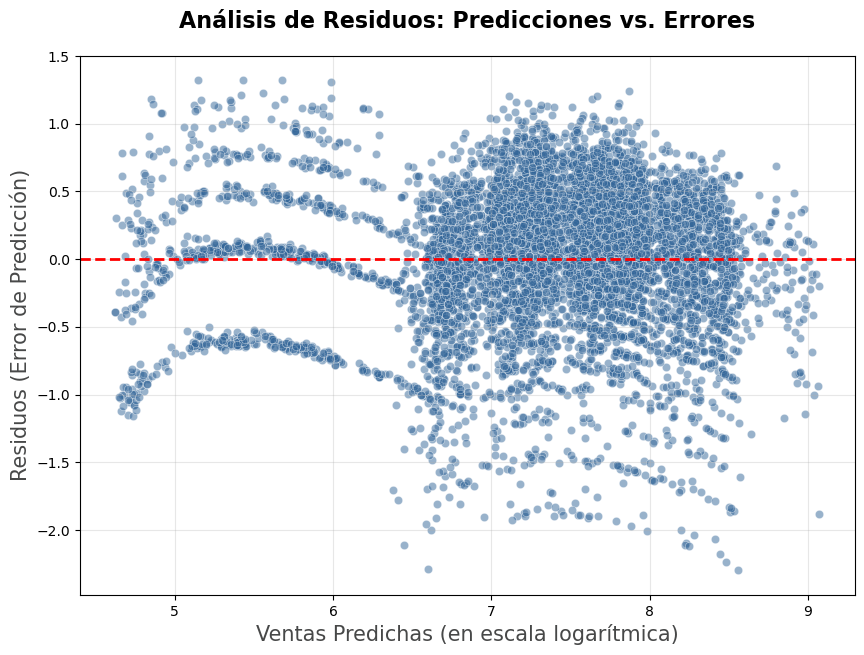

In [143]:
y_pred = baseline_model.predict(X_train_sm)

residuos = y_train_preprocessed - y_pred

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.5, color=AZUL_3)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title('Análisis de Residuos: Predicciones vs. Errores', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ventas Predichas (en escala logarítmica)', fontsize=15, c=GRIS_2)
plt.ylabel('Residuos (Error de Predicción)', fontsize=15, c=GRIS_2)
plt.grid(alpha=0.3)

plt.show()

### <font color='#c30afd'>**Observaciones: Análisis de Residuos**</font>

El análisis del gráfico de residuos permite identificar varios patrones relevantes:

1. **Presencia de heterogeneidad estructural**

Se observan claramente dos grandes agrupamientos de puntos:

* **Grupo con mayor concentración hacia la derecha del eje X** (mayores valores predichos): posiblemente asociado a supermercados, que presentan mayores volúmenes de ventas.
* **Grupo con menor densidad hacia la izquierda**: probablemente correspondiente a Grocery Stores.

En el grupo de supermercados se observa una dispersión considerablemente mayor de los residuos, lo que sugiere un incremento de la varianza a medida que aumenta el nivel de ventas.

2. **Evidencia de heterocedasticidad**

En el subconjunto izquierdo (menor volumen de ventas) permite distinguir con mayor claridad cuatro patrones curvos en forma de "boomerang".

Estos patrones coinciden con los cuatro subconjuntos previamente identificados en el análisis exploratorio entre `Item_MRP` y `Item_Outlet_Sales`, donde se observaban segmentos diferenciados de precios.

Este comportamiento sugiere que:

* La relación entre precio (`Item_MRP`) y ventas no es estrictamente lineal.
* La varianza del error aumenta con el nivel de precio.
* Existe una posible estructura segmentada en los datos no completamente capturada por el modelo lineal aditivo.

En consecuencia, se observa evidencia de heterocedasticidad y posible mala especificación funcional.

3. **Sesgo en las predicciones**

Se observa que los residuos más pronunciados tienden a ubicarse por debajo de la línea horizontal en 0.

Dado que:

$$\large \text{Residuo} = y_i - \hat{y}_i$$

Un residuo negativo implica que:

$$\large \hat{y}_i > y_i$$

Por lo tanto, el modelo presenta una tendencia a sobreestimar las ventas en ciertos rangos.

### <font color='#e698fe'>**OLS 2**</font>

`Item_MRP`, `Outlet_Type_Supermarket Type1`, `Outlet_Type_Supermarket Type2`, `Outlet_Type_Supermarket Type3`

In [144]:
X_sm2 = sm.add_constant(X_train_df)
X_sm2.columns

Index(['const', 'Item_MRP', 'Item_Weight', 'Item_Visibility',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Item_Fat_Content_Regular'],
      dtype='object')

In [145]:
X_sm2 = X_sm2[['const', 'Item_MRP', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]

In [146]:
ols_2 = sm.OLS(y_train_preprocessed, X_sm2).fit()
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     4313.
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        12:03:51   Log-Likelihood:                -5455.5
No. Observations:                6818   AIC:                         1.092e+04
Df Residuals:                    6813   BIC:                         1.096e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### <font color='#c30afd'>**Observaciones OLS 2**</font>

Para validar las hipótesis formuladas a partid de los valores estadísticos del resumen de Baseline Model, se entrenó un modelo OLS utilizando solo las **variables que presentaron un P-Value < 0.001**:

* `Item_MRP`
* `Outlet_Type_Supermarket Type1`
* `Outlet_Type_Supermarket Type2`
* `Outlet_Type_Supermarket Type3`

Este, obtiene métricas prácticamente idénticas al modelo entrenado con la totalidad de las variables.

In [147]:
baseline_model_results = metricas_evaluacion(baseline_model, 
                                             'Baseline Model - OLS', 
                                             X_train=X_train_sm, 
                                             X_test=X_test_sm,
                                             observaciones='Heterocedasticidad')

results_tracking.append(baseline_model_results)

In [148]:
pd.DataFrame(results_tracking)

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,Heterocedasticidad


## <font color='#fddf0a'>**Conclusiones: Baseline Model - OLS**</font>

El modelo base utilizado — OLS (Ordinary Least Squares) —, explica aproximadamente el 72% de la variabilidad de la variable objetivo en escala logarítmica, lo que indica un buen ajuste global en el conjunto de entrenamiento.

No obstante, el análisis de residuos evidencia presencia de heterocedasticidad y patrones segmentados, posiblemente asociados al tipo de tienda y a niveles de precio previamente identificados en el análisis exploratorio. Esto sugiere que el modelo lineal aditivo podría no estar capturando completamente la estructura subyacente de los datos.

Si bien la inferencia fue corregida mediante el uso de errores estándar robustos (HC3), la estructura observada en los residuos indica potencial oportunidad de mejora mediante:

* Incorporación de interacciones
* Segmentación estructural
* O utilización de modelos con mayor capacidad de capturar relaciones complejas.

## <font color='#fde74c'>**Random Forest Regressor**</font>

In [149]:
from sklearn.ensemble import RandomForestRegressor

### <font color='#e698fe'>**RandomForest 1**</font>

In [150]:
rf_1= RandomForestRegressor(
    n_estimators=300,       
    max_depth=None,          
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",     
    bootstrap=True,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

In [151]:
rf_1.fit(X_train_df, y_train_preprocessed)

RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42)

In [152]:
rf_1_y_pred_train = rf_1.predict(X_train_df)

In [153]:
rf_1_y_pred_test = rf_1.predict(X_test_df)

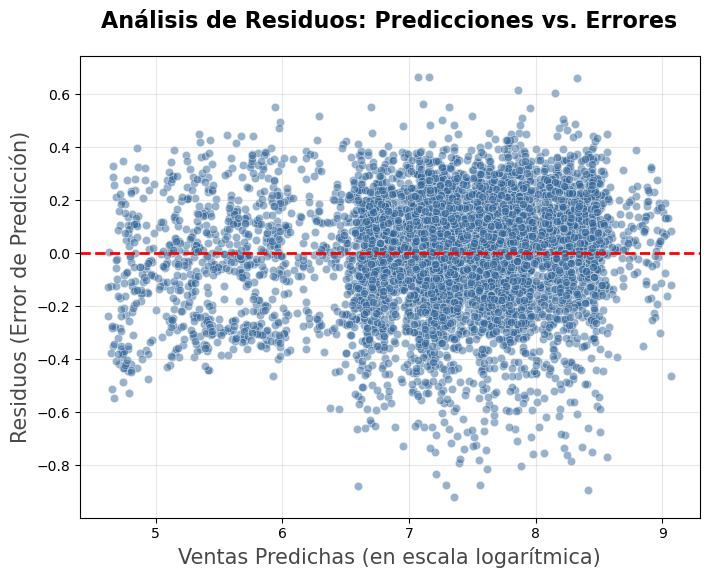

In [154]:
residuos = y_train_preprocessed - rf_1_y_pred_train

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.5, color=AZUL_3)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title('Análisis de Residuos: Predicciones vs. Errores', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ventas Predichas (en escala logarítmica)', fontsize=15, c=GRIS_2)
plt.ylabel('Residuos (Error de Predicción)', fontsize=15, c=GRIS_2)
plt.grid(alpha=0.3)

plt.show()

In [155]:
rf_1.score(X_train_df, y_train_preprocessed)

0.958819830705543

In [156]:
rf_1.score(X_test_df, y_test_preprocessed)

0.709273064891782

In [157]:
rf_1_results = metricas_evaluacion(rf_1, 'RandomForest 1')
results_tracking.append(rf_1_results)

In [158]:
pd.DataFrame(results_tracking)

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,Heterocedasticidad
1,RandomForest 1,0.9588,0.7093,-0.2495,0.5529,775.10,---


In [159]:
rf_1.feature_importances_

array([0.33011135, 0.08048862, 0.11901039, 0.05298603, 0.10080582,
       0.17407271, 0.02565624, 0.06284618, 0.00235676, 0.00215141,
       0.00382043, 0.00382911, 0.00427574, 0.00450132, 0.00186425,
       0.00282149, 0.00383514, 0.00305499, 0.00175623, 0.00133579,
       0.00474508, 0.00317165, 0.00185959, 0.0086437 ])

In [160]:
features = X_train_df.columns
importancias = pd.DataFrame({'Feature': features, 'Importancia': rf_1.feature_importances_})
importancias.sort_values('Importancia', ascending=False)

,Feature,Importancia
0,Item_MRP,0.330111
5,Outlet_Type_Supermarket Type1,0.174073
2,Item_Visibility,0.119010
4,Outlet_Size,0.100806
1,Item_Weight,0.080489
7,Outlet_Type_Supermarket Type3,0.062846
3,Outlet_Location_Type,0.052986
6,Outlet_Type_Supermarket Type2,0.025656
23,Item_Fat_Content_Regular,0.008644
20,Item_Type_Snack Foods,0.004745


### <font color='#c30afd'>**Observaciones: RandomForest 1**</font>

* **Capacidad de Generalización:** A diferencia del modelo OLS, el Random Forest demuestra una habilidad superior para manejar la estructura no lineal de los datos. Aunque la distinción entre Grocery Stores y Supermarkets persiste, la desaparición visual de los bloques de precios en los residuos indica que el modelo está capturando interacciones más complejas que una simple pendiente lineal.

* **Diversidad de Variables:** Mientras que el modelo Baseline OLS dependía casi exclusivamente de 4 variables críticas (Item_MRP y los tipos de supermercado), este modelo integra una mayor diversidad de características para generar sus predicciones, reduciendo el carácter determinístico del sistema.

* **Diagnóstico de Sobreajuste (Overfitting):** Al no limitar la profundidad de los árboles (max_depth), el modelo cayó en una memorización excesiva de los datos. Esto se evidencia en la brecha crítica del $R^2$: un 0.9588 en entrenamiento frente a un 0.7093 en prueba (variación de -0.2495).

* **Impacto en el Error:** Esta falta de generalización resultó en un RMSE superior al obtenido en el modelo base, lo que invalida este experimento para su uso en producción pero valida el potencial del algoritmo si se optimiza correctamente.

Si bien Random Forest Regressor no asume el supuesto matemático de varianza constante del error (homocedasticidad), al evaluar el comportamiento de los residuos se observa la capacidad de este modelo de manejar la estructura subyacente en los datos. La diferenciación entre **Grocery Stores** y **Supermarkets** sigue siendo evidente, pero los bloques de precios ya no se distinguen a simple vista, lo que demuestra una capacidad de generalización superior del modelo.

Además, Random Forest utiliza mayor cantidad de variables para hacer sus predicciones, a diferencia de lo observado en el segundo experimento de `Baseline Model - OLS`, donde se probó que el modelo utilizaba principalmente 4 variables: `Item_MRP`, `Outlet_Type_Supermarket_Type1`, `Outlet_Type_Supermarket_Type1`, `Outlet_Type_Supermarket_Type1`, mientras que el valor predictivo del resto era despreciable. El uso de una mayor diversidad de características hace que el modelo sea menos determinístico.

Sin embargo, ya que para un primer experimento no se limitó la profundidad de los árboles (`max_depth`), es posible observar un claro sobreajuste a los datos de entrenamiento. La métrica **R-Squared** en los datos de entrenamiento fue de **0.9588**, mientras que en el conjunto de prueba, esta cae a 0.7093, una variación de -0.2495. Esto implica que el modelo memorizo los datos de entrenamiento, en vez de aprender el patron subyacente en ellos, lo cual se refleja en un **RMSE *(Raíz Cuadrada del Error Cuadrático Medio)*** mayor que el obtenido en el modelo base (`Baseline Model - OLS`).

Por esta razón, dado que Random Forest muestra mejor capacidad para manejar la estructura presente en los datos, se buscará optimizar este modelo a partir de sus hiperparámetros y variables utilizadas.

### <font color='#e698fe'>**RandomForest 2 - max_depth = 10**</font>

In [161]:
rf_2 = RandomForestRegressor(
            n_estimators=300,        
            max_depth=10,          
            min_samples_split=2,
            min_samples_leaf=1,
            max_features="sqrt",     
            bootstrap=True,
            random_state=RANDOM_SEED,
            n_jobs=-1
)

rf_2.fit(X_train_df, y_train_preprocessed)


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300,
                      n_jobs=-1, random_state=42)

In [162]:
comment = 'max_depth = 10'
rf_2_results = metricas_evaluacion(rf_2, 'RandomForest 2', observaciones=comment)
results_tracking.append(rf_2_results)

In [163]:
pd.DataFrame(results_tracking)

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,Heterocedasticidad
1,RandomForest 1,0.9588,0.7093,-0.2495,0.5529,775.10,---
2,RandomForest 2,0.7596,0.7041,-0.0555,0.5578,781.02,max_depth = 10


In [164]:
importancias_rf_2 = pd.DataFrame({'Feature': features, 'Importancia': rf_2.feature_importances_})
importancias_rf_2 = importancias_rf_2.sort_values('Importancia', ascending=False)
importancias_rf_2

,Feature,Importancia
0,Item_MRP,0.322749
5,Outlet_Type_Supermarket Type1,0.224157
4,Outlet_Size,0.136880
7,Outlet_Type_Supermarket Type3,0.087796
2,Item_Visibility,0.075002
3,Outlet_Location_Type,0.068248
6,Outlet_Type_Supermarket Type2,0.031173
1,Item_Weight,0.030710
23,Item_Fat_Content_Regular,0.004012
12,Item_Type_Frozen Foods,0.001930


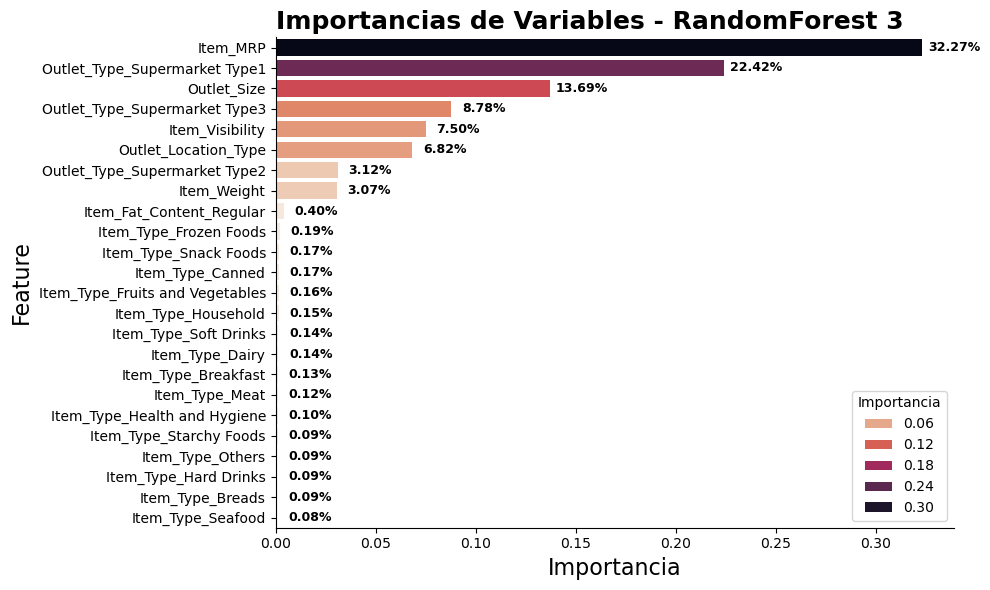

In [165]:
plot_analisis_variables(df=importancias_rf_2, 
                        nombre_modelo='RandomForest 3', 
                        save='rf_3',
                        n_vars=None,
                        save_path=IMG_PATH,
                        space=0.05,
                        cmap='rocket_r')

### <font color='#c30afd'>**Observaciones: RandomForest 2 - max_depth=10**</font>

* **Mitigación del Sobreajuste:** Al limitar la profundidad de los árboles a un máximo de 10 niveles, se logró una mejora drástica en la capacidad de generalización del modelo. La brecha de la métrica $R^{2}$ entre entrenamiento y prueba se redujo de -0.2495 (en el experimento anterior) a solo -0.0555, validando que el modelo ya no está memorizando ruido.
  
* **Comparativa vs. Baseline OLS:** A pesar de la mayor estabilidad, las métricas de error (RMSE) y precisión ($R^{2}$) aún no logran superar al modelo base de regresión lineal. Esto indica que, aunque el Random Forest maneja mejor la estructura de los datos, el límite de profundidad impuesto podría estar restringiendo la captura de patrones relevantes que el modelo lineal sí detecta a través de los coeficientes de `Item_MRP`.

* **Análisis de Importancia de Variables (Feature Importance):** El análisis revela que el modelo asigna un peso insignificante a las variables `Item_Type` e `Item_Fat_Content`. Esto coincide con tus hallazgos previos sobre la homogeneidad del mix de ventas, sugiriendo que el modelo puede simplificarse sin pérdida de rendimiento.

Al limitar la profundidad de los árboles, es posible controlar el sobreajuste del modelo.
A diferencia del caso anterior, donde la **variación de la metrica $R^2$** del modelo en el conjunto de entrenamiento y el conjunto de prueba fue de **-0.2495**, `RandomForest 2` obtiene una variación de tan solo **-0.0555**.
Sin embargo, sus métricas no consiguen superar al modelo base, tanto $R^2$ como **RMSE** siguen siendo mejores en el modelo base, que como se dijo anteriormente, no consigue manejar correctamente la estructura de los datos.

Por otra parte, al analizar las **Importancias** de las variables, se observa que el modelo prácticamente no hace uso del tipo de producto (Item_Type) ni del contenido graso, por lo que se buscará simplificar el modelo para evaluar su desempeño.

### <font color='#e698fe'>**Random Forest 3 - No Item_Type**</font>

In [166]:
columnas_rf_3 = ['Item_MRP', 'Item_Weight', 'Item_Visibility', 'Outlet_Location_Type',
       'Outlet_Size', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_Regular']

In [167]:
rf_3 = RandomForestRegressor(
    n_estimators=300,        
    max_depth=10,          
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",   
    bootstrap=True,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

rf_3.fit(X_train_df[columnas_rf_3], y_train_preprocessed)



RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300,
                      n_jobs=-1, random_state=42)

In [168]:
comment = 'No Item_Type'
rf_3_results = metricas_evaluacion(rf_3, 
                                   'RandomForest 3', 
                                   X_train=X_train_df[columnas_rf_3],
                                   X_test=X_test_df[columnas_rf_3], 
                                   observaciones=comment)

results_tracking.append(rf_3_results)

In [169]:
pd.DataFrame(results_tracking)

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,Heterocedasticidad
1,RandomForest 1,0.9588,0.7093,-0.2495,0.5529,775.10,---
2,RandomForest 2,0.7596,0.7041,-0.0555,0.5578,781.02,max_depth = 10
3,RandomForest 3,0.8143,0.7393,-0.0750,0.5236,729.55,No Item_Type


### <font color='#c30afd'>**Observaciones: RandomForest 3 - No Item_Type**</font>

* **Reducción de Ruido:** Siguiendo los hallazgos del análisis de importancia de variables, se eliminaron todas las categorías correspondientes a Item_Type. Esta simplificación eliminó el ruido estadístico, permitiendo que el modelo optimizara el uso de las variables con mayor peso relativo.

* **Hito de Performance:** Este experimento marca un punto de inflexión, logrando un $R^2 = 0.7393$ en el conjunto de prueba. Superar el umbral del 74% de variabilidad explicada confirma que la arquitectura simplificada es más robusta que las versiones más complejas.

* **Optimización del Error:** Se alcanzó el RMSE más bajo registrado hasta el momento en todos los experimentos. Esto valida que la eliminación de variables irrelevantes no solo mejora el coeficiente de determinación, sino que también aumenta la precisión puntual de las predicciones en pesos.

* **Balance Sesgo-Varianza:** Aunque la brecha entre entrenamiento y prueba aumentó levemente respecto al experimento anterior, el rendimiento absoluto en datos no vistos es superior, lo que justifica la elección de este set de variables para las etapas de ajuste fino.

Al simplificar el modelo, se obtiene una mejora en las métricas evaluadas. Se optó por remover todas las variables correspondientes al tipo de producto (`Item_Type`), lo cual permitió reducir el ruido estadístico.

El modelo `RandomForest 3`, alcanza a explicar casi el 74% de la variabilidad de los datos en el conjunto de prueba, con una métrica $R^2 = 0.7393$. Si bien la variación entre el conjunto de entrenamiento y el conjunto de prueba es mayor al experimento anterior, en ambos casos $R^2$ es superior.
Esto se refleja en la medida del error **RMSE**, la cual es la mínima hasta el momento.

Este experimento demostró que el modelo se beneficia de simplificar el conjunto de variables predictoras, conservando solo aquellas con poder predictivo y eliminando aquellas que introducen ruido al modelo.

Sin embargo, aún no se han optimizado los hiperparámetros, por lo que el siguiente paso será hacer una búsqueda exhaustiva que permita optimizar su desempeño.

### <font color='#e698fe'>**Random Forest 4 - Randomized Search**</font>

In [170]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import KFold

In [171]:
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [172]:
rf_4 = RandomForestRegressor(random_state=RANDOM_SEED)

param_dist = {
    'n_estimators': randint(100, 500),    
    'max_depth': [None, 5, 8, 12, 15],      
    'min_samples_leaf': randint(2, 6),      
    'min_samples_split': randint(2, 10),
    'max_features': [1.0, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse'] 
}

random_search = RandomizedSearchCV(
    estimator=rf_4,             
    param_distributions=param_dist, 
    n_iter=150,                 
    cv=kf,                      
    scoring='r2',              
    random_state=RANDOM_SEED,
    n_jobs=-1,                  
    verbose=1                   
)


random_search.fit(X_train_df, y_train_preprocessed)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 5, 8, 12, 15],
                                        'max_features': [1.0, 'sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178C2057710>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178E24107D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178C21677D0>},
                   random_state=42, scoring='r2', verbose=1)

In [173]:
best_estimator_1 = random_search.best_estimator_

In [174]:
best_estimator_1.score(X_test_df, y_test_preprocessed)

0.7449110823368377

In [175]:
rf_4_results = metricas_evaluacion(best_estimator_1, 'RandomForest 4', observaciones='Randomized Search')
results_tracking.append(rf_4_results)

In [176]:
pd.DataFrame(results_tracking)

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,Heterocedasticidad
1,RandomForest 1,0.9588,0.7093,-0.2495,0.5529,775.10,---
2,RandomForest 2,0.7596,0.7041,-0.0555,0.5578,781.02,max_depth = 10
3,RandomForest 3,0.8143,0.7393,-0.0750,0.5236,729.55,No Item_Type
4,RandomForest 4,0.7443,0.7449,0.0006,0.5179,720.87,Randomized Search


### <font color='#c30afd'>**Observaciones: RandomForest 4 - Randomized Search**</font>

* **Pico de Performance:** Mediante la optimización sistemática de hiperparámetros, el modelo alcanzó una capacidad explicativa del 74.49% ($R^2$) en el conjunto de prueba, el valor más alto registrado en el ciclo de experimentación.

* **Capacidad de Generalización Superior:** Este modelo destaca por ser el primero en mostrar una variación no negativa entre el entrenamiento y la prueba. Esta estabilidad es una prueba empírica de que el modelo ha capturado los patrones subyacentes sin memorizar ruido, ofreciendo la máxima fiabilidad para su despliegue en el microservicio.

* **Precisión de Error Mínima:** Se lograron los valores más bajos de RMSE y MAE de toda la serie de experimentos. Esto asegura que las desviaciones del modelo son las más pequeñas posibles tanto en términos estadísticos como en valores reales de mercado.

* **Interpretación en Unidades de Negocio:** Al revertir la transformación logarítmica, el modelo presenta un MAE de 720.87. Esto permite comunicar a los interesados de BigMart que, en promedio, el margen de error del modelo es de:

  $$\large \text{Venta Estimada} = \hat{y} \pm 720.87$$

A partir de la optimización de hiperparámetros del modelo, El modelo `RandomForest 4` consigue las mejores métricas hasta el momento, con una capacidad de explicar el **74.49% de la variabilidad de los datos de prueba**.

A su vez, es el que mejor variación presenta entre los datos de entrenamiento y los datos de prueba. Como es posible observar en la tabla presentada, es el único modelo hasta el momento que no sufre una variación negativa al evaluar sus capacidades en el conjunto **Test** (datos de prueba). Esto es una prueba empírica de su capacidad de generalización, lo cual ofrece mayor seguridad para su uso en entornos productivos.

A su vez, es el que presenta un menor **RMSE *(Root Mean Squared Error o Raiz Cuadrada del Error Cuadrático Medio)***. 

Por otra parte, también es posible observar que también cuenta con el menor **MAE *(Mean Absolute Error o Error Medio Absoluto)***. Está métrica revierte la transformación logarítmica aplicada a la variable objetivo para poder medir el error en terminos absolutos y en unidades reales de negocio. Lo cual implica, para este caso, que le modelo en términos medios, puede cometer un error de:

$$\large \text{Ventas Estimada} = \hat{y} \pm 720.87$$


Ahora que se vio que la optimización de hiperparámetros trajo mejoras significativas, se realizará una búsqueda de hiperparámetros con el conjunto de variables reducidas para afinar aún más el modelo.

### <font color='#e698fe'>**Random Forest 5: Randomized Search - No Item_Type**</font>

In [177]:
rf_5 = RandomForestRegressor(random_state=RANDOM_SEED)

param_dist = {
    'n_estimators': randint(100, 500),      
    'max_depth': [None, 5, 8, 12, 15],      
    'min_samples_leaf': randint(2, 6),      
    'min_samples_split': randint(2, 10),
    'max_features': [1.0, 'sqrt', 'log2'], 
    'criterion': ['squared_error', 'friedman_mse'] 
}

random_search = RandomizedSearchCV(
    estimator=rf_5,             
    param_distributions=param_dist, 
    n_iter=150,                 
    cv=kf,                      
    scoring='r2',              
    random_state=RANDOM_SEED,
    n_jobs=-1,                  
    verbose=1                   
)


random_search.fit(X_train_df[columnas_rf_3], y_train_preprocessed)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 5, 8, 12, 15],
                                        'max_features': [1.0, 'sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178E24A5A50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178E24A5250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178E24A79D0>},
                   random_state=42, scoring='r2', verbose=1)

In [178]:
best_estimator_2= random_search.best_estimator_

In [179]:
best_estimator_2.score(X_test_df[columnas_rf_3], y_test_preprocessed)

0.7448081938491402

In [180]:
rf_5_results = metricas_evaluacion(best_estimator_2, 
                                   'RandomForest 5',
                                   X_train=X_train_df[columnas_rf_3],
                                   X_test=X_test_df[columnas_rf_3],
                                   observaciones='Randomized Search - No Item_Type')

results_tracking.append(rf_5_results)

In [181]:
pd.DataFrame(results_tracking)

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,Heterocedasticidad
1,RandomForest 1,0.9588,0.7093,-0.2495,0.5529,775.10,---
2,RandomForest 2,0.7596,0.7041,-0.0555,0.5578,781.02,max_depth = 10
3,RandomForest 3,0.8143,0.7393,-0.0750,0.5236,729.55,No Item_Type
4,RandomForest 4,0.7443,0.7449,0.0006,0.5179,720.87,Randomized Search
5,RandomForest 5,0.7442,0.7448,0.0006,0.5180,721.10,Randomized Search - No Item_Type


In [182]:
importancias_rf_5 = pd.DataFrame({'Feature': columnas_rf_3, 'Importancia': best_estimator_2.feature_importances_})
importancias_rf_5 = importancias_rf_5.sort_values('Importancia', ascending=False)

In [183]:
importancias_rf_5

,Feature,Importancia
0,Item_MRP,0.386820
4,Outlet_Size,0.340216
5,Outlet_Type_Supermarket Type1,0.189906
7,Outlet_Type_Supermarket Type3,0.037481
6,Outlet_Type_Supermarket Type2,0.034737
2,Item_Visibility,0.008796
1,Item_Weight,0.001838
3,Outlet_Location_Type,0.000120
8,Item_Fat_Content_Regular,0.000086


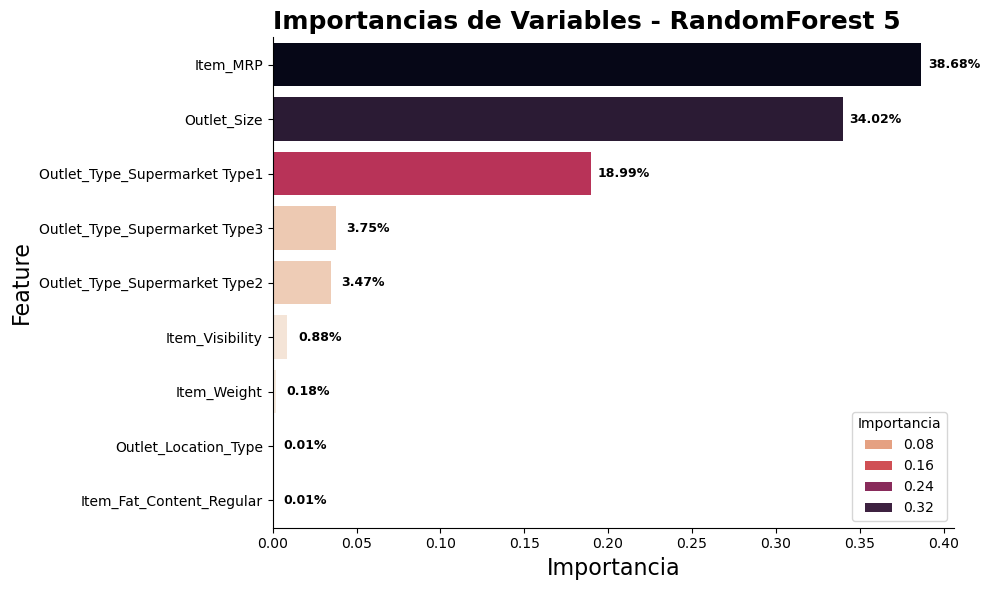

In [184]:
plot_analisis_variables(df=importancias_rf_5, 
                        nombre_modelo='RandomForest 5', 
                        save='rf_5',
                        n_vars=None,
                        save_path=IMG_PATH,
                        space=0.05,
                        cmap='rocket_r')

In [185]:
ultimas = importancias_rf_5.tail(4)
ultimas['Importancia'].sum()

0.010840713853108327

In [186]:
X_train_df.shape

(6818, 24)

In [187]:
1 - ultimas['Importancia'].sum()

0.9891592861468916

### <font color='#c30afd'>**Observaciones: RandomForest 5 - Randomized Search - No Item_Type**</font>

* **Análisis de Costo-Beneficio:** Aunque se observa una caída marginal en las métricas ($R^2$: -0.01%, MAE: +$0.23), el modelo ha sido simplificado drásticamente mediante la eliminación de 15 variables predictoras. En entornos productivos y arquitecturas de microservicios, esta reducción disminuye la latencia de respuesta y los costos de procesamiento, justificando plenamente la mínima variación en la precisión.

* **Ley de Pareto en los Datos:** El análisis de Feature Importances reveló una concentración extrema del poder predictivo. Solo 5 variables explican el 98.91% de las decisiones del modelo:

  - `Item_MRP`
  - `Outlet_Size`
  - `Outlet_Type_Supermarket Type 1`
  - `Outlet_Type_Supermarket Type 3`
  - `Outlet_Type_Supermarket Type 2`<br><br>

* **Hacia la Arquitectura Minimalista:** La irrelevancia estadística del resto de las variables confirma que el comportamiento de ventas en CusTech está impulsado por el precio y el formato físico de la tienda, más que por las características intrínsecas del producto.

* **Próximo Paso:** Con el fin de maximizar la eficiencia para el despliegue de la API, se procederá a un experimento final utilizando exclusivamente este "Top 5" de variables, buscando el equilibrio óptimo entre ligereza y capacidad explicativa.

| Model	            | Train R-Squared	| Test R-Squared	| R-Squared Variability	| RMSE Test	  | MAE	    | Observaciones                    |
|-------------------|-------------------|-------------------|-----------------------|-------------|---------|----------------------------------|
| RandomForest 4	| 0.7443	        | 0.7449	        | 0.0006	            | 0.5179	  | 720.87	| Randomized Search                |
| RandomForest 5	| 0.7442	        | 0.7448	        | 0.0006	            | 0.5180	  | 721.10	| Randomized Search - No Item_Type |


Si bien `RandomForest 5` obtiene una leve caida en sus métricas: 

* $R^2$ = -0.01
* **RMSE**= +0.01
* **MAE** = +0.23

Se eliminaron 15 features. Esto, en entornos productivos y en grandes volumenes de datos, puede signifcar una gran optimización en costos, lo cual justifica las pequeñas variaciones presentadas.

En adición a esto, se observaron las **Importancias *(Feature Importances)*** de `RandomForest 5` y se observó que este utiliza en un **98.91%** los 5 top features para generar las predicciones:

* `Item_MRP`
* `Outlet_Size`
* `Outlet_Type_Supermarket Type1`
* `Outlet_Type_Supermarket Type3`
* `Outlet_Type_Supermarket Type2`

Lo cual ofrece aún mayor espacio de optimización para reducir la complejidad del modelo y ahorrar en costos. Por lo que, se entrenará un último modelo con los hiperparámetros encontrados en el presente experimento y reduciendo el conjunto de variables a las previamente mencionadas para comprar los resultados obtenidos.

In [188]:
best_params_rf_5 = random_search.best_params_

In [189]:
top_5 =  importancias_rf_5.head(5)
top_5 = top_5['Feature'].to_list()

In [190]:
best_params_rf_5

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 250}

### <font color='#e698fe'>**RandomForest 6: Top 5 Columns Importancias RandomForest 5**</font>

In [191]:
rf_6 = RandomForestRegressor(random_state=RANDOM_SEED, **best_params_rf_5)


rf_6.fit(X_train_df[top_5], y_train_preprocessed)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=250, random_state=42)

In [192]:
rf_6_results = metricas_evaluacion(rf_6, 
                                   'RandomForest 6',
                                   X_train=X_train_df[top_5],
                                   X_test=X_test_df[top_5],
                                   observaciones='Top 5 Columns Importancias RandomForest 5')

results_tracking.append(rf_6_results)

In [193]:
X_train_df[top_5].head()

,Item_MRP,Outlet_Size,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type2
0,0.470709,1.0,1.0,0.0,0.0
1,0.457877,0.0,1.0,0.0,0.0
2,-0.482625,0.0,1.0,0.0,0.0
3,-1.603553,0.0,1.0,0.0,0.0
4,0.218375,0.0,1.0,0.0,0.0


In [194]:
pd.DataFrame(results_tracking)

,Model,Train R-Squared,Test R-Squared,R-Squared Variability,RMSE Test,MAE,Observaciones
0,Baseline Model - OLS,0.7179,0.7291,0.0112,0.5337,747.87,Heterocedasticidad
1,RandomForest 1,0.9588,0.7093,-0.2495,0.5529,775.10,---
2,RandomForest 2,0.7596,0.7041,-0.0555,0.5578,781.02,max_depth = 10
3,RandomForest 3,0.8143,0.7393,-0.0750,0.5236,729.55,No Item_Type
4,RandomForest 4,0.7443,0.7449,0.0006,0.5179,720.87,Randomized Search
5,RandomForest 5,0.7442,0.7448,0.0006,0.5180,721.10,Randomized Search - No Item_Type
6,RandomForest 6,0.7434,0.7445,0.0011,0.5183,720.81,Top 5 Columns Importancias RandomForest 5


### <font color='#c30afd'>**Observaciones: RandomForest 6 - Top 5 Columns Importancias RandomForest 5**</font>

* **Validación de Hipótesis:** El experimento confirma que la reducción drástica del conjunto de datos a las 5 variables con mayor poder predictivo genera un impacto casi imperceptible en la precisión del modelo. Las variaciones en el $R^2$ (-0.03) y el **RMSE** (+0.03) son estadísticamente despreciables frente a la ganancia en eficiencia operativa.

* **Mejora en la Precisión Real:** Es destacable que el **MAE** presentó una leve **mejora de -0.19**, lo que indica que, al eliminar el ruido de las variables secundarias, el modelo es marginalmente más exacto en la estimación de pesos reales.

* **Optimización para el Microservicio:** Este modelo es el candidato definitivo para el entorno productivo. Al requerir solo 5 entradas de datos (Item_MRP, Outlet_Size y los tres tipos de Outlet_Type), la velocidad de inferencia de la API será máxima y el consumo de memoria mínimo.

* **Conclusión Técnica:** Se ha logrado transformar un modelo inicial con sobreajuste masivo en una herramienta robusta, generalizable y de bajo costo computacional, lista para integrarse en la arquitectura de BigMart.

Confirmando la hipótesis planteada en el experimento anterior, la reducción de variables predictoras trae una variabilidad mínima en las métricas del modelo `RandomForest 6`:

* $R^2$ = -0.03
* **RMSE** = +0.03
* **MAE** = -0.19 (aquí hay una leve mejora)

Esto permite optimización operativa en términos de infraestructura y velocidad de procesamiento.

## <font color='#fddf0a'>**Conclusiones: Random Forest Regressor**</font>

La fase de experimentación con Random Forest permitió evolucionar de un modelo con alto sobreajuste `RandomForest 1`($R^2$ Train: 0.95 vs Test: 0.70) hacia una arquitectura optimizada y robusta.

A su vez, a partir del análisis de los residuos, se comprobó que este algoritmo consigue manejar correctamente la estructura subyacente en los datos, a diferencia del modelo base (`Baseline Model - OLS`) que incumplía con uno de los supuestos matemáticos de los modelos lineales: **homocedasticidad de los residuos**.

Mediante el uso de RandomizedSearchCV y la poda de características (Feature Selection), se determinó que el **98.91%** de la capacidad predictiva reside en solo 5 variables clave. 

* `Item_MRP`
* `Outlet_Size`
* `Outlet_Type_Supermarket Type1`
* `Outlet_Type_Supermarket Type3`
* `Outlet_Type_Supermarket Type2`

El modelo final (`RandomForest 6`) no solo es más ligero y eficiente para su despliegue, sino que presenta una mínima brecha de generalización entre entrenamiento y prueba ($R^2$ Variability: 0.0011), garantizando fiabilidad en datos productivos.

Así, el modelo `RandomForest 6` se tomará para su despliegue en entornos productivos.

# <font color='#7099c2'>**Conclusiones**</font>

## <font color='#fddf0a'>**Conclusiones de Negocio**</font>

A lo largo del análisis de datos realizado en el presente notebook, se concluye lo siguiente:

* #### <font color='#e698fe'>**El precio es el principal determinante del nivel de ventas de un producto**</font>

> El precio máximo de venta al público (`Item_MRP`) es el determinante principal del volumen de ventas. Sin embargo, su impacto está fuertemente condicionado por el formato y tamaño de la tienda.

* #### <font color='#e698fe'>**Tamaño y Tipo de Tienda**</font>

> Si bien el Análisis Exploratorio de Datos (EDA) sugería un impacto moderado del tamaño de la tienda, la interacción conjunta con el precio (`Item_MRP`) en el modelo reveló que esta variable posee el segundo mayor poder predictivo del sistema.

> Se identifican dos bloques de negocio a partir del tipo de tienda: Grocery Stores y Supermarkets. La diversidad de productos ofrecida en estos conjuntos varía significativamente, con un aproximado de 530 productos en el primer grupo y 930 para el segundo. Esto tiene un impacto directo en las ventas totales generadas por cada uno de ellos.

* #### <font color='#e698fe'>**Simplificación del Portafolio**</font>

> Se descartaron variables como el tipo de producto (`Item_Type`), visibilidad (`Item_Visibility`), contenido graso (`Item_Fat_Content`) y peso del producto (`Item_Weight`) identificó que no influyen en la predicción de las ventas esperadas.

> A pesar de que se observó que el 50% de las ventas de la cadena BigMart proviene de 4 categorías principales, este factor no tiene poder predictivo signficativo, al menos no por sí solo. El modelo seleccionado para entornos productivos descarta esta variable dado que solo introducia ruido estadístico.

## <font color='#fddf0a'>**Ampliación del Análisis**</font>

Para enriquecer el presente análisis, se sugiere la recolección de la siguiente información:

* #### <font color='#e698fe'>**Información del cliente**</font>

> Poder entender el perfil de cliente que acude a cada tienda, permitiría adecuar tanto la oferta de productos como de promociones a cada tipo de tienda. Aspectos como: distnacia que recorre para llegar a la tienda, edad, poder adquisitivo, permitirían enriquecer el análisis para desarrollar campañas de marketing dirigidas.

* #### <font color='#e698fe'>**Granularidad de los items**</font>

> La información provista sobre los items es quizás demasiado general. Se intentó obtener las unidades vendidas al dividir la venta total por el Item_MRP, pero esto arrojó valores decimales, es decir, no se obtienen unidades Esto sugiere que el Item_MRP provisto podría ser un promedio o incluir variaciones por promociones no registradas.<br>
> Entender el volumen de venta, el stock disponible, permitirá comprender en mayor profundidad el comportamiento de las ventas de cada producto.

* #### <font color='#e698fe'>**Características de las tienda**</font>

> Dado que se determinó que tanto el tamaño como el tipo de tienda son variables con fuerte poder predictivo, el poder introducir variables con mayor detalle en el análisis permitiría obtener más precisión tanto en el análisis como en las predicciones.

## <font color='#fddf0a'>**Estrategias de Negocio**</font>

Basado en el rendimiento del modelo final y los hallazgos del dataset de Big Mart, se proponen las siguientes líneas de acción:

* #### <font color='#e698fe'>**Optimización de Precios Segmentada**</font>

> Dado que el `Item_MRP` es el driver principal de ventas, se recomienda implementar una estrategia de precios diferenciada por tipo de tienda. Los **Supermarkets Type 3** soportan una mayor variabilidad de precios con retornos altos, mientras que en las Grocery Stores el foco debe ser la rotación de productos de precio bajo-medio para maximizar el espacio limitado.

* #### <font color='#e698fe'>**Reasignación de Espacios (Visibilidad vs. Ventas)**</font>

> El modelo demostró que la visibilidad actual no garantiza mayores ventas e incluso introduce ruido. Se sugiere un programa piloto para reducir el "clutter" (amontonamiento) en góndolas, priorizando la exhibición basada en el rendimiento predictivo del modelo en lugar de una distribución uniforme por categoría, con el objetivo de optimizar el espacio y la rotación de productos.


* #### <font color='#e698fe'>**Campañas de Fidelización y Atracción**</font>

> Para maximizar las ventas de las tiendas, se sugiere lanzar campañas de fidelización que permitan recolectar información sobre el perfil demográfico poder entender el público de cada tienda y así desarrollar campañas de marketing dirigidas.


# <font color='#7099c2'>**Artefactos**</font>

In [195]:
# Generar un nuevo procesador con las columnas utilizadas por el modelo

cols_process = ['Item_MRP', 'Outlet_Size', 'Outlet_Type']
size_order = ['Small', 'Medium', 'High']

preprocessor_prod = make_column_transformer(
    # 1. Variables Numéricas: aplicamos StandardScaler
    (StandardScaler(), ['Item_MRP']),
    
    # 2. Ordinales: Mantenemos el orden lógico
    (OrdinalEncoder(categories=[size_order]), 
     ['Outlet_Size']),
    
    # 3. Nominales: OneHotEncoder (se utiliza drop=first para evitar introducir multicolinealidad)
    (OneHotEncoder(drop='first', sparse_output=False), 
     ['Outlet_Type']),
    
    remainder='drop'
)


preprocessor_prod.fit(X_train[cols_process])

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Item_MRP']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Outlet_Type'])])

In [196]:
import pickle

# Función auxiliar para guardar
def guardar_archivo(objeto, ruta, nombre_archivo):
    try:
        with open(ruta / nombre_archivo, 'wb') as f:
            pickle.dump(objeto, f)
        print(f"Guardado: {ruta}\\{nombre_archivo}")
    except Exception as e:
        print(f'Error al guardar {nombre_archivo} en {ruta}')
        print(e)

In [197]:
metadata = {
    'cols_required': cols_process,
    'target_transform': 'np.log1p',
    'inverse_transform': 'np.expm1'
}

In [198]:
top_5

['Item_MRP',
 'Outlet_Size',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type3',
 'Outlet_Type_Supermarket Type2']

In [199]:
# Modelo 
guardar_archivo(rf_6, MODELS_PATH, 'champion.pkl')

# Preprocessor
guardar_archivo(preprocessor_prod, MODELS_PATH, 'preprocessor.pkl')

# Columnas a procesar
guardar_archivo(cols_process, MODELS_PATH, 'cols_process.pkl')

# Orden Columnas Predicción
guardar_archivo(top_5, MODELS_PATH, 'cols_order.pkl')

# Metadata
guardar_archivo(metadata, MODELS_PATH, 'metadata.pkl')


Guardado: C:\Users\Ignacio\JupyterScripts\PiChallenge\models\champion.pkl
Guardado: C:\Users\Ignacio\JupyterScripts\PiChallenge\models\preprocessor.pkl
Guardado: C:\Users\Ignacio\JupyterScripts\PiChallenge\models\cols_process.pkl
Guardado: C:\Users\Ignacio\JupyterScripts\PiChallenge\models\cols_order.pkl
Guardado: C:\Users\Ignacio\JupyterScripts\PiChallenge\models\metadata.pkl


# <font color='#7099c2'>**Procesamiento Datos de Prueba**</font>

In [200]:
datetime.now()

datetime.datetime(2026, 2, 20, 12, 16, 0, 979126)

In [204]:
def apply_model(file, ruta_objetos, ruta_guardado):

    import pickle
    
    import pandas as pd
    import numpy as np
    from datetime import datetime

    from pathlib import Path
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
    from sklearn.compose import make_column_transformer


    # Cargar objetos
    with open(ruta_objetos/ 'preprocessor.pkl', 'rb') as f:
        preprocessor = pickle.load(f)
    with open(ruta_objetos/ 'cols_process.pkl', 'rb') as f:
        cols_process = pickle.load(f)
    with open(ruta_objetos/ 'cols_order.pkl', 'rb') as f:
        cols_order = pickle.load(f)
    with open(ruta_objetos/ 'champion.pkl', 'rb') as f:
        champion_model = pickle.load(f)

    # Extracción de datos
    df = pd.read_csv(file)
    
    # Preprocesamiento de datos
    X = df[cols_process].copy()
    
    # Comprobar Nulos 
    if 'Outlet_Size' in X.columns:
        X['Outlet_Size'] = X['Outlet_Size'].fillna('Small') # Se completa con Small ya que es el valor modal
    # Preprocesador
    X_preprocessed = preprocessor.transform(X)

    columnas = preprocessor.get_feature_names_out()
    #print(columnas)
    columnas_encoded = []
    for columna in columnas:
        columna = columna.split('__')[1]
        columnas_encoded.append(columna)
    #print(columnas_encoded)
    
    X_df = pd.DataFrame(X_preprocessed, columns=columnas_encoded)

    # Predicción
    sales_projection_log = champion_model.predict(X_df[cols_order])
    # Invertir la transformación logarítmica
    sales_projection = np.round(np.expm1(sales_projection_log), 2)
    
    df['Sales_Projection'] = sales_projection
    
    timestamp = datetime.now().strftime('%Y%m%d')

    save_string = ruta_guardado/f'sales_projection_{timestamp}.csv'
    df.to_csv(save_string, index=False)
    print(f'Archivo guardado: {save_string}')
    return df

In [205]:
test = apply_model(DATA_PATH/'Test_BigMart.csv', MODELS_PATH, RESULTS_PATH)

Archivo guardado: C:\Users\Ignacio\JupyterScripts\PiChallenge\results\sales_projection_20260220.csv


In [206]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_Projection
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1497.12
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1226.58
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,506.17
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2215.49
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5212.78
